# **Comparing Preprocessing Methods of Textual Data for Semantic Analysis in Stock Trend Predictions**

## **Abstract**

This paper presents a novel approach to predicting stock trends using textual data from a large corpus named "all-the-news-2-1." Articles related to finance were filtered and categorized into four groups: General, APPL, NTFX, and AMZN, based on their relevance to specific stocks. The text data underwent preprocessing steps including lemmatization and removal of stopwords. Three distinct preprocessing methods—Part-of-Speech (POS) tagging, Bigrams, and Word Embeddings (WE)—were applied to the title and article columns, followed by sentiment analysis. Financial parameters were integrated with the processed textual data, and each unique dataset (POS, Bigrams, WE) was used to train Long Short-Term Memory (LSTM) models. The input for the LSTM models consisted of a 5-day rolling window containing 20 randomly selected articles per day, with padding applied as necessary. The output was the predicted stock trend for the fifth day. This approach aims to compare the effectiveness of the three preprocessing methods in enhancing stock trend prediction, demonstrating the potential of combining textual sentiment analysis and financial metrics.


## **Introduction**

In recent years, advancements in artificial intelligence (AI), particularly in natural language processing (NLP), have been leveraged by researchers to predict trends in the financial market. The shift from physical securities trading on stock exchanges to electronic trading has facilitated the development of algorithms that execute trades independently and more efficiently.

Beyond analyzing financial data and indicators, these algorithms can benefit from analyzing natural language found in articles, social networks, and financial news to predict market trends and exploit them for profit. Researchers apply models such as KNN, Random Forest, SVM, CNN, RNN, LSTM, Bayesian networks, and Transformers to NLP tasks to predict investor sentiment and market trends.

It has been found that more advanced models, such as LSTM and Transformers, produce analyses capable of competing with traditional trading strategies. Additionally, the method of preprocessing verbal data is of great importance. However, satisfactory solutions have not yet been found for various issues, such as ethics, crisis prediction, and the practical application potential of these predictions.

Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language. The ultimate goal of NLP is to enable computers to understand, interpret, and produce human language. Unlike traditional algorithmic trading methods, algorithmic trading using machine learning (ML) tools relies heavily on NLP.

This does not mean that financial tools and data (indices) developed by economists over the years are not used. Instead, the combination of NLP with these indicators can often produce market analyses that predict the expected trend (up or down) of various traded items. While it is not always possible to measure the exact degree of change, information about the direction and confidence level of a model can influence and assist traders or systems in maximizing profits.

The trend of a particular item traded on the market is influenced by financial indicators based on statistics and research, as well as by the traders themselves. Since it is impossible for a model to understand the inner thoughts of every trader or entity in the market, predicting these tendencies is typically done by analyzing information found across the Internet. This includes sources where people express their feelings and expectations about assets, such as the press, social networks, and economic blogs.

By deciphering this information using NLP tools, patterns can be identified that contribute to a better understanding of market trends and provide recommendations on how to invest in response.

As mentioned, various researchers are trying to use artificial intelligence tools to optimize their ability to predict market trends with the aim of applying this knowledge to determine which stocks to hold and which to sell in order to maximize investors' profits. The use of the NLP subfield has been gaining momentum in recent years. NLP tools can change our ability to understand and predict complex financial events, and bring the past lessons of traders over the years, presented in writing (in the form of financial statement analysis and news), into clearer focus in analyzing and predicting trends in the financial market. The use of these models requires performing and following the basic steps of artificial intelligence for depositing products. These steps are: data collection and cleaning, feature extraction, model selection, model training and testing, model evaluation, and finally results analysis.

The prediction of stock trends is a critical task in financial markets, offering valuable insights for investors and analysts. Traditional methods often rely on numerical financial data, but recent advancements in natural language processing (NLP) have opened new avenues for incorporating textual information into predictive models. This study leverages a comprehensive corpus of news articles, "all-the-news-2-1," to explore the impact of textual data on stock trend prediction.

The corpus was filtered to extract articles related to finance and categorized into four groups: General, APPL, NTFX, and AMZN. Preprocessing steps, including lemmatization and removal of stopwords, were applied to the title and article columns to standardize the text. Three different preprocessing techniques—POS tagging, Bigrams, and WE—were employed to capture various linguistic features. Sentiment scores were calculated for both the title and article columns to quantify the emotional tone of the text.

To integrate textual data with traditional financial metrics, the processed datasets were combined with relevant financial parameters. Each unique dataset (POS, Bigrams, WE) was then used to train LSTM models, which are well-suited for sequential data analysis. The input for the LSTM models consisted of a 5-day rolling window of 20 randomly selected articles per day, with padding applied as necessary to handle varying article counts. The models aimed to predict the stock trend for the fifth day, providing a forward-looking perspective based on both textual sentiment and financial data.

This study highlights the potential of NLP techniques in enhancing stock trend prediction and underscores the importance of integrating diverse data sources for more accurate forecasting.

## Setting requirements

### Pip, Imports and constants 

In [1]:
%%capture
# Install Dask or PyArrow for large dataset handling (optional)
%pip install dask pyarrow.

# Install TensorFlow and Keras for LSTM
%pip install tensorflow

# Install Hugging Face Transformers for FinBERT
%pip install transformers

# Install Torch for FinBERT model
%pip install torch

# Install NumPy and Pandas for data manipulation
%pip install numpy pandas

# Install Scikit-learn for data preprocessing and evaluation metrics
%pip install scikit-learn

# Install Matplotlib and Seaborn for data visualization
%pip install matplotlib seaborn

# Install Jupyter Notebook extensions (optional, for enhanced notebook features)
%pip install jupyter_contrib_nbextensions

# Install NLTK for text processing
%pip install nltk

# Install yfinance for stock data
%pip install yfinance

# Ensure TensorFlow is installed
%pip install tensorflow

# Install pandas_market_calendars for market calendars
%pip install pandas-market-calendars

# install wordcloud for word cloud visualization
%pip install wordcloud

# install scipy for scientific computing
%pip install scipy==1.10.1

# install gensim for word2vec
%pip install gensim

# install pandas_datareader for stock data
%pip install pandas_datareader

%pip install --upgrade typing_extensions

In [2]:
%%capture
# Import necessary libraries for the project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('all')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_market_calendars as mcal
import gensim
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IMPORT_FILES = True
TEST = False

## NLP for Market Analysis

Researchers are increasingly turning to artificial intelligence tools to enhance their ability to forecast market trends, aiming to use this insight to decide which stocks to hold and which to sell, ultimately maximizing investor profits. The use of Natural Language Processing (NLP), a subfield of AI, has gained traction in recent years. NLP tools can revolutionize our ability to understand and predict complex financial events by leveraging the written experiences of traders (such as financial reports and news articles) for more focused analysis and market trend forecasting.

Through models like LSTMs, Random Forests, and Transformers, it is possible to filter news, social media, and financial reports to identify early indicators of market behavior. As a result, many researchers are exploring how NLP can complement or even replace traditional market prediction methods. Using these models requires adherence to basic AI workflow steps: data collection and cleaning, feature extraction, model selection, training and testing, model evaluation, and result analysis.

## Data Collection and Feature Extraction

Market analysis using NLP typically involves two schools of thought regarding data sources:

### School 1: Technical + Textual Data
- Combines financial indicators such as opening/closing prices, moving averages, and momentum indices.
- Acknowledges the limitations of relying solely on technical data, as it often lags behind market sentiment.
- NLP can bridge this gap by providing timely sentiment analysis.

**Technical Indicators:**
- **Relative Strength Index (RSI):** Measures momentum and potential overbought/oversold conditions.
- **Simple Moving Average (SMA):** Calculates the average price over a defined period.
- **Exponential Moving Average (EMA):** Gives more weight to recent prices for faster trend detection.
- **MACD (Moving Average Convergence Divergence):** Momentum indicator based on the difference between 12-period and 26-period EMA.
- **On-Balance Volume (OBV):** Uses volume flow to anticipate changes in stock price.
- **Adjusted Closing Price:** Accounts for after-market events like dividends and stock splits.

**Textual Features Added:**
- Sentiment score (positive/neutral/negative)
- Subjectivity score (objective vs. opinionated content)
- Word counts, including counts of positive and negative words

### School 2: Textual Data Only
- Relies entirely on linguistic sources like financial news or platforms such as StockTwits.
- StockTwits allows users to self-label messages as "bullish" or "bearish," offering labeled sentiment data.

**Example Datasets:**
- 29,000 English tweets related to Google, Nvidia, and Apple over 9 years.
- "Financial Phrasebank": 5,000 expert-tagged sentiment sentences from Finnish financial news.
- 2.7 million news articles (9.2GB) from major outlets like Reuters and CNN.

These textual features are incorporated into models to enhance market trend forecasting.

## Preprocessing: From Text to Numerical Data

### Tokenization
- Splits text into smaller units called tokens (words, phrases, or symbols).
- Often done using libraries like NLTK.
- Prepares the data for numerical vector representation.
- Tokenization types: Sentence and Word tokenization.
- One-Hot Encoding is a common but memory-intensive representation.

### POS Tagging and Chunking
- POS Tagging assigns grammatical labels (noun, verb, adjective) to each token.
- Chunking groups tagged tokens into syntactic units (e.g., noun phrases).
- IOB (Inside-Outside-Beginning) tagging further refines chunk boundaries.

### Bag of Words (BoW)
- Converts text into numerical vectors based on word frequency.
- Ignores grammar and word order.
- Sparse representation with limitations on capturing context.

### N-Grams
- Captures sequences of 'n' words to retain word order and local context.
- Types: Unigram (n=1), Bigram (n=2), Trigram (n=3).
- Improves contextual understanding over simple BoW.

**Impact Example:**
- Including bigrams increased accuracy from 72.407% to 74.617%, while trigrams showed limited further improvement.

### Text Normalization
- Ensures consistency through:
  - Lowercasing text
  - Removing punctuation
  - Expanding contractions
- Commonly applied in all NLP workflows.

### Stemming vs. Lemmatization
- **Stemming:** Strips affixes to return root forms (may not yield real words).
- **Lemmatization:** Uses vocabulary and context to return valid base forms.
- Lemmatization is more accurate but computationally intensive.

### Stop Word Removal
- Removes common, non-informative words (e.g., "the", "is").
- Reduces vector size and improves computational efficiency.
- Custom stop word lists are used for domain-specific tasks (e.g., financial terms).

## Word Embedding (WE): Advanced Vectorization

WE maps words into dense vectors capturing semantic similarity and relationships.
- Embeddings reduce dimensionality (1-300 dimensions vs. high-dimensional BoW).
- Place similar words close together in vector space.

### Benefits of WE:
1. **Semantic Relations:** Captures synonyms and analogies (e.g., "king" - "man" + "woman" = "queen").
2. **Contextual Similarity:** Groups words used in similar contexts.
3. **Dimensionality Reduction:** Smaller, denser vectors.
4. **Generalization:** Transfers knowledge across NLP tasks.

### WE Techniques:

**Count-based:**
- **Latent Semantic Analysis (LSA):** Uses word co-occurrence matrix + dimensionality reduction.
- **Pointwise Mutual Information (PMI):** Measures co-occurrence probability.

**Prediction-based:**
- **Word2Vec (Skip-gram & CBOW)**
- **GloVe:** Combines count and prediction approaches.
- **FastText:** Handles subword information and OOV (out-of-vocabulary) words.

**Contextualized Embeddings:**
- Dynamic embeddings that vary with word usage (e.g., BERT).
- Handle polysemy better than static embeddings.

### Evaluation of Embeddings:
- **Intrinsic:** Tests semantic/syntactic relationships (e.g., word similarity tasks).
- **Extrinsic:** Measures impact on downstream NLP tasks (e.g., sentiment analysis).

### Challenges:
- **OOV Handling:** Early models struggle with unseen words.
- **Polysemy:** Single vectors for multi-meaning words are limiting.
- **Bias:** May reflect and amplify societal biases in training data.

### Popular Pre-trained Embeddings:
- **Word2Vec:** Google News (3 million words, 300 dimensions).
- **GloVe:** Trained on Common Crawl and Wikipedia.
- **FastText:** Multilingual support and subword info.
- **BERT:** Contextualized embeddings from massive datasets.

### Applications of Word Embedding:
- Text classification (sentiment, spam, topic categorization)
- Machine translation
- Chatbots and Q&A systems
- Search engine relevance improvement

### Future Directions:
- More efficient contextual models (e.g., distilled BERT, quantized embeddings)
- Bias mitigation in embeddings
- Expansion of cross-lingual and domain-specific embeddings

## Preprocessing Examples in Research

- Common steps: lowercasing, punctuation removal, keyword filtering, stop word removal, and tokenization.
- Some researchers avoided cleaning structured financial data as it contained no missing values.

**Advanced Transformations:**
- Replacing stock symbols (e.g., $AAPL) with "cashtag"
- URLs replaced with "linktag"
- User mentions with "usertag"
- Filtering out short messages (<3 words)
- Final preparation for ML models

### Tradeoffs in Preprocessing:
- Removing stop words can hurt accuracy if domain-relevant (e.g., "up", "down" in finance)
- Emojis and punctuation can improve accuracy (e.g., by 0.38 and 0.30 percentage points)

---

This document captures a comprehensive view of how NLP tools and preprocessing techniques can enhance stock market prediction. Let me know if you'd like any of these sections expanded further!



## Textual data preparations

### Data Exploration & Visualization All the News 2.1 Dataset Review

**Overview**

The "All the News 2.1" dataset is an extensive collection of news articles and essays from 27 American publications. It spans from January 1, 2016, to April 2, 2020, and is an expanded edition of the original "All the News" dataset.

**Dataset Details**

- **Total Articles:** 2,688,878
- **Publications:** 27 American publications
- **Time Span:** January 1, 2016 - April 2, 2020
- **File Format:** CSV
- **Size:** 3.4 GB compressed, 8.8 GB uncompressed

**Data Fields**

Each row in the dataset contains the following fields:

- **Date:** Datetime of article publication
- **Year:** Year of article publication
- **Month:** Month of article publication
- **Day:** Day of article publication
- **Author:** Article author (if available)
- **Title:** Article title
- **Article:** Article text (without paragraph breaks)
- **URL:** Article URL
- **Section:** Section of the publication in which the article appeared (if applicable)
- **Publication:** Name of the article publication

**Publications Included**

Some of the notable publications in the dataset include:

- Axios
- Business Insider
- Buzzfeed News
- CNBC
- CNN
- Economist
- Fox News
- Gizmodo
- Mashable
- New York Times
- Reuters
- TechCrunch
- The Hill
- Washington Post

**Methodology**

- **Data Collection:** Publications were scraped with Python according to the publications' sitemaps, with a few exceptions (like Vox) involving RSS feeds.
- **Last Scraping Date:** April 2, 2020

**Applications**

The dataset is suitable for various NLP and machine learning tasks, including:

- Sentiment analysis
- Topic modeling
- Trend analysis
- Text classification

**Limitations**

- **Non-Commercial Use:** The dataset is intended for non-commercial, research purposes only.
- **Bias:** As with any dataset, there may be inherent biases based on the sources included.

The "All the News 2.1" dataset is a valuable resource for researchers and developers working on NLP and machine learning projects. Its comprehensive coverage and detailed metadata make it a versatile tool for various analytical tasks.

In [4]:
import os
import pandas as pd

# Define the file path
file_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/all-the-news-2-1.csv"

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}. Ensure the dataset is downloaded and placed correctly.")

# Load the dataset
news_df = pd.read_csv(file_path, low_memory=False)

# Build the date column by combining year, month, and day
news_df['date'] = pd.to_datetime(news_df[['year', 'month', 'day']])

# Convert to string format YYYY-MM-DD
news_df['date'] = news_df['date'].dt.strftime('%Y-%m-%d')

# Rename the column to 'Date'
news_df.rename(columns={'date': 'Date'}, inplace=True)

# Define the date range
start_date = "2016-01-01"
end_date = "2020-04-02"

# Filter the dataset for the date range
filtered_news = news_df.loc[(news_df['Date'] >= start_date) & (news_df['Date'] <= end_date)]


ParserError: Error tokenizing data. C error: out of memory

#### plotting visualization of count duplicates and missing values ​​in news data set

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unified plotting function
def plot_columns(data):
    num_cols = len(data.columns)
    rows = (num_cols // 4) + (num_cols % 4 > 0)  # Create enough rows for 5 columns per row
    fig, axes = plt.subplots(rows, 4, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, column in enumerate(data.columns):
        unique = data[column].nunique()
        missing = data[column].isnull().mean() * 100
        
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(data[column]):
            sns.histplot(data[column].dropna(), kde=False, bins=30, ax=ax)
            ax.set_title(f"{column} | Unique: {unique}, Missing: {missing:.2f}%, Min: {data[column].min()}, Max: {data[column].max()}")
        elif column in ["publication"]:
            plot = sns.countplot(y=data[column], order=data[column].value_counts().index, ax=ax)
            plot.bar_label(plot.containers[0])
            ax.set_title(f"{column} | Unique: {unique}, Missing: {missing:.2f}%")
        else:
            dupes, nulls = data.duplicated(subset=[column]).sum(), data[column].isnull().sum()
            plot = sns.barplot(x=["Duplications", "Missing"], y=[dupes, nulls], ax=ax)
            plot.bar_label(plot.containers[0])
            ax.set_title(f"{column} | Duplications & Missing")
        ax.set_ylabel(column)
        ax.set_xlabel("Count")
        
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove unused subplots
    
    plt.tight_layout()
    plt.show()

# Execute plotting
plot_columns(filtered_news)

The first aspect to address is the nature of the dataset. A large portion of the titles are not explicitly related to finance, and as such, they will be excluded from our analysis. The distribution of titles across years is mostly balanced, with the exception of 2020, which contains approximately half the number of titles compared to other years. On a monthly scale, the dataset is fairly consistent, although the first quarter tends to have a slightly higher average volume. At the daily level, a notable rise in the number of titles is observed toward the end of each month.

Within the textual columns, a reasonable amount of duplication is found in fields such as author and section, which is expected. However, duplication in title, article, and URL is more likely the result of syndicated content—articles republished across multiple platforms or collected from different aggregation sources. The distribution of titles by publication is notably imbalanced, which may introduce bias. Nevertheless, factors such as posting frequency, topical coverage, and publication scope may explain this discrepancy. More importantly, the dataset has been used in prior studies for similar predictive tasks, lending credibility to its application in this context [8].

As part of the preprocessing, we will drop the columns year, author, URL, section, and publication. We will also remove any rows with missing values in the title, article, or date fields, and eliminate duplicate entries based on the title, keeping only the first occurrence.

#### Data cleaning 

In [ ]:
import gc

# Remove the duplicates by missing by policy provided above
before = len(filtered_news)

# MISSING VALUES 
# Remove the rows with missing values unless the column is an author or section
filtered_news = filtered_news.dropna(subset=['title', 'article', 'Date'])

# Remove the duplicate rows
filtered_news = filtered_news.drop_duplicates()

# Remove the duplicates from the filtered news dataset based on the title column and keep the first occurrence 
filtered_news = filtered_news.drop_duplicates(subset='title', keep='first')

# Now that we have found and removed all the duplicates, we can remove unnecessary columns, i.e., ones that will not be used in the analysis
filtered_news = filtered_news.drop(columns=['year', 'author', 'url', 'section', 'publication'])

after = len(filtered_news)

print(f"We have deleted {before - after} rows and we currently have {after} rows in our DataFrame")

gc.collect()

### Creating Financial News Data
To ensure that the dataset focuses strictly on financially relevant content, we applied a keyword-based filtering process. A curated list of financial terms—including stock tickers (e.g., AAPL, AMZN, NFLX), company names, financial indicators, and economic terminology—was used to construct a regular expression pattern. Articles were initially selected if either the title or the body contained at least one of these keywords. To further refine the dataset and improve content relevance, a stricter filter was applied, retaining only those entries where both the title and the article contained at least one financial keyword. This dual-condition filtering helps ensure that the remaining data is truly centered around financial topics, which is critical for downstream modeling tasks such as sentiment analysis and trend forecasting. For preview purposes, the top entries were truncated to display just the beginning of the title and article fields, offering a quick glimpse into the dataset's contents without overwhelming detail.

In [ ]:
# Define financial keywords
keywords = [
        'AAPL', 'Apple', 'Apple Inc.', 'iPhone', 'MacBook', 'iPad', 'Apple stock',
        'AMZN', 'Amazon', 'Amazon Inc.', 'AWS', 'Prime', 'Amazon stock'
        'NFLX', 'Netflix', 'Netflix Originals', 'Streaming', 'Netflix stock'
        'stock', 'stocks', 'shares', 'equity', 'price movement', 'market trends',
        'bull market', 'bear market', 'market volatility', 'earnings report',
        'quarterly results', 'forecast', 'valuation', 'trading volume', 'short squeeze',
        'revenue', 'profits', 'losses', 'dividends', 'growth', 'inflation',
        'recession', 'GDP', 'interest rates', 'policy changes'
]

# Create a regex pattern
keyword_pattern = '|'.join(keywords)

# Filter articles based on keywords
filtered_news = filtered_news[
    filtered_news['title'].str.contains(keyword_pattern, case=False, na=False) |
    filtered_news['article'].str.contains(keyword_pattern, case=False, na=False)
]

# Further refine by ensuring both title and article contain financial terms
filtered_news = filtered_news[
    (filtered_news['title'].str.contains(keyword_pattern, case=False, na=False)) &
    (filtered_news['article'].str.contains(keyword_pattern, case=False, na=False))
]

# Save the financial news dataset
# filtered_news_file_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/filtered_news.csv"
# filtered_news.to_csv(filtered_news_file_path, index=False)
data_head = filtered_news.head(10).copy()

# Truncate the strings in 'title' and 'article' columns
data_head['title'] = data_head['title'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)
data_head['article'] = data_head['article'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)


#### Categorizing Financial News Articles
To enhance the structure and interpretability of the dataset, each article was categorized based on its financial relevance to specific companies. A new column, Ticker, was initialized with the default label "General". We defined keyword groups for three primary stocks—AAPL, AMZN, and NFLX—alongside a broader General category for terms related to the overall financial market. The categorization function evaluated each article by examining both its title and content (converted to lowercase for case-insensitive matching). The logic prioritized the title: if a company-specific keyword was found there, the article was immediately tagged with that company’s ticker. If no match was found in the title, the article body was checked next. This method ensures that articles are associated with the most relevant financial entity, helping downstream tasks like company-specific sentiment analysis and trend prediction remain more focused and accurate.

In [ ]:
# Initialize a 'Ticker' column with a default value of 'General'
filtered_news['Ticker'] = 'General'

# Define keyword groups for categorization
keywords = {
    'AAPL': ['AAPL', 'Apple', 'Apple Inc.', 'iPhone', 'MacBook', 'iPad', 'Apple stock'],
    'AMZN': ['AMZN', 'Amazon', 'Amazon Inc.', 'AWS', 'Prime', 'Amazon stock'],
    'NFLX': ['NFLX', 'Netflix', 'Netflix Originals', 'Streaming', 'Netflix stock'],
    'General': [
        'stock', 'stocks', 'shares', 'equity', 'price movement', 'market trends',
        'bull market', 'bear market', 'market volatility', 'earnings report',
        'quarterly results', 'forecast', 'valuation', 'trading volume', 'short squeeze',
        'revenue', 'profits', 'losses', 'dividends', 'growth', 'inflation',
        'recession', 'GDP', 'interest rates', 'policy changes'
    ]
}

# Function to categorize articles based on prioritization
def categorize_article(row):
    # Combine 'title' and 'article' for comprehensive keyword matching
    title = row['title'].lower() if isinstance(row['title'], str) else ''
    article = row['article'].lower() if isinstance(row['article'], str) else ''

    # Check title first
    for group, group_keywords in keywords.items():
        if any(keyword.lower() in title for keyword in group_keywords):
            # Return the first matching group unless it is 'General'
            if group != 'General':
                return group

    # If no match in title, check article
    for group, group_keywords in keywords.items():
        if any(keyword.lower() in article for keyword in group_keywords):
            return group

    # Default to 'General' if no match
    return 'General'

# Apply the categorization function to each row
filtered_news['Ticker'] = filtered_news.apply(categorize_article, axis=1)


##### Visualize new categorised data

In [ ]:
# Save the categorized news to a CSV file
# categorized_news_file_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/categorized_news.csv"
# filtered_news.to_csv(categorized_news_file_path, index=False)

# plot the distribution of the news articles by group with labels
plt.figure(figsize=(12, 8))
plot = sns.countplot(x=filtered_news['Ticker'], order=filtered_news['Ticker'].value_counts().index)
plot.bar_label(plot.containers[0])
plt.title("Distribution of News Articles by Ticker")
plt.xlabel("Ticker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


##### Aligning News Data with NYSE Trading Calendar

To ensure our dataset accurately reflects real-world trading activity, we utilized the pandas_market_calendars library—an uncommon but highly effective tool for financial time series alignment. We specifically used the NYSE (New York Stock Exchange) calendar via mcal.get_calendar('NYSE') to retrieve the full list of valid trading days between January 1, 2016, and January 1, 2021. This step is crucial because financial news often includes dates when the stock market is closed, such as weekends and holidays. Without filtering for actual trading days, we risk misinterpreting gaps or inconsistencies in the time series as missing data when in fact, the market simply wasn't open. By aligning our data to this calendar, we could identify true missing days where no articles were published, rather than mistakenly counting non-trading days as data gaps. After removing timezone metadata for compatibility, we reindexed our grouped dataset to match the exact sequence of NYSE trading days, inserting zeros where articles were absent. This created a consistent time series that aligns perfectly with the operational days of the market—an essential foundation for any time-dependent modeling like LSTM or other financial forecasting approaches.

In [ ]:
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define the NYSE calendar
nyse = mcal.get_calendar('NYSE')

# Define date range
start_date = "2016-01-01"
end_date = "2020-04-02"

# Convert 'Date' column to datetime format
filtered_news['Date'] = pd.to_datetime(filtered_news['Date'])

# Check if any rows in 'filtered_news' are outside the valid date range
print(f"Filtered news date range: {filtered_news['Date'].min()} to {filtered_news['Date'].max()}")

# Group by 'Date' and 'Ticker' to count articles per day per stock
news_counts = filtered_news.groupby(['Date', 'Ticker']).size().unstack(fill_value=0)

# Get valid trading days from the NYSE calendar
trading_days = pd.to_datetime(nyse.valid_days(start_date=start_date, end_date=end_date))

# Remove any timezone information from trading_days to match filtered_news dates
trading_days = trading_days.tz_localize(None)

# Reindex to ensure all trading days are present (fill missing with 0)
news_counts = news_counts.reindex(trading_days, fill_value=0)

# Remove "noisy" data: Set values greater than 150 to NaN (or 0)
news_counts[news_counts > 150] = 0

# Count the number of days with 0 articles for at least one ticker
days_with_no_articles = (news_counts == 0).any(axis=1).sum()

# Print the count of days with zero articles for at least one ticker
print(f"Number of days with zero articles for at least one ticker: {days_with_no_articles}")

# Get tickers
tickers = news_counts.columns.tolist()

# Set up subplot grid (2x2 for up to 4 tickers)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Iterate over tickers and plot
for i, ticker in enumerate(tickers[:4]):  # Ensure we only plot up to 4 tickers
    ax = axes[i]
    sns.histplot(news_counts[ticker], bins=20, kde=False, ax=ax, color='blue')
    
    # Calculate statistics
    avg = news_counts[ticker].mean()
    median = news_counts[ticker].median()
    min_articles = news_counts[ticker].min()
    max_articles = news_counts[ticker].max()
    days_below_avg = (news_counts[ticker] < avg).sum()
    days_below_median = (news_counts[ticker] < median).sum()
    
    # Plot vertical lines for average and median
    ax.axvline(avg, color='red', linestyle='--', label=f'Avg: {avg:.1f}')
    ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
    
    # Labels and title
    ax.set_title(f"News Articles per Day - {ticker}")
    ax.set_xlabel("Number of Articles")
    ax.set_ylabel("Trading Days")
    ax.legend()
    
    # Print stats
    print(f"{ticker} - Days below Avg: {days_below_avg}, Days below Median: {days_below_median}, Min: {min_articles}, Max: {max_articles}")

# Remove unused subplots if there are fewer than 4 tickers
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#####  Dataset Characteristics and Distribution Insights

Next, we conducted a sanity check by capping the maximum daily article count per ticker at 150, which helped remove noisy outliers that could skew the distribution. We then explored the distribution of article counts per trading day using histograms for each stock category. This helped us understand the temporal spread and density of available news data. We observed that **a significant number of trading days had zero articles for at least one ticker**—215 such days in total. Furthermore, descriptive statistics for each stock showed that the **average and median number of articles per day** varied across tickers, with "General" articles having the highest maximum at 150 and NFLX having the lowest at 50. These insights guided the next stage of filtering.

#####  Controlled Sampling Strategy: Why 20 Articles per Day?

To create a more manageable dataset while maintaining representative coverage, we chose to **randomly sample up to 20 articles per ticker per day**. This value was selected strategically—it’s **below the average article count for most tickers**, ensuring that we’re not overly reducing the data while still controlling for overrepresentation and redundancy. This step helps standardize the input size for models like LSTM, which benefit from consistent temporal structure across batches. For faster, lightweight experimental runs, especially in testing environments, we introduced a flag (`TEST`) that allows switching to just **one article per day**. This is particularly useful during hyperparameter tuning, debugging, or validation cycles where full-scale computation is unnecessary or costly. After applying this filter, we printed the number of rows removed and retained, giving a clear view of how much the dataset was pruned for efficiency.

In [ ]:
import gc
import pandas as pd

max_sample = 1 if TEST else 20

before = len(filtered_news)
    
# Count news articles per stock per day
news_counts = filtered_news.groupby(['Date', 'Ticker']).size().reset_index(name='count')

# Find the minimum news count on any day across all stocks
min_news_per_day = news_counts['count'].min()
min_news_date = news_counts[news_counts['count'] == min_news_per_day]['Date'].unique()

# Count how many stock-days have more than this minimum
above_min_count = (news_counts['count'] > min_news_per_day).sum()

# Apply filtering: randomly sample up to max_sample articles per date per ticker
filtered_news = (
    filtered_news.groupby(['Date', 'Ticker'], group_keys=False)
    .apply(lambda x: x.drop(columns=['Date', 'Ticker']).sample(n=min(len(x), max_sample), random_state=42))
    .reset_index())


# Free memory
gc.collect()

after = len(filtered_news)

print(f"We have deleted {before - after} rows and we currently have {after} rows in our DataFrame")


## Text Normalization and Dimensionality Reduction in NLP

### Text normalization
is performed to create uniformity in textual data. It involves converting text into a standard format after tokenization. This includes several steps such as converting text to lowercase, removing punctuation marks, and handling abbreviations (common in languages such as English). For example, the phrase "לת ה" will be converted to the full word "לת התארוטות." Given its effectiveness in model training processes, various implementation approaches are used in almost every NLP application. Text normalization is common in the data preparation phase as a step that assists in consistency-based analysis during information processing.

As mentioned, some methods, such as Bag of Words (BoW), use large vectors to represent linguistic information. In computational tasks, particularly in machine learning (ML), we often want to reduce the input dimensions to improve computation times and space efficiency. Currently, methods such as stemming and lemmatization are used for this purpose.

### Stemming
is the process of converting words to their root (grammatical) form by removing prefixes and suffixes. The resulting root form will not always be a legal word. This process is commonly used in search engines to help match different forms of a word to improve search results. It is also used in text classification, where it reduces the dimensionality of text data, making it easier to analyze. The process may not be beneficial in cases where there is over-stemming, reducing words too aggressively to the point of losing meaning (for example, the phrase "running for elections" that is converted to "run" and "elect" will lose its meaning). In contrast, under-stemming may not reduce words enough and increase the dimensionality of the data.

Porter Stemmer is one of the most common stemming algorithms and is known for its simplicity and efficiency.
Snowball Stemmer is an improved version of Porter Stemmer with more extensive rules that remove suffixes while maintaining the original word order.
Lemmatization is a process similar to stemming in that it reduces words to their basic or dictionary form. However, unlike stemming, lemmatization uses the context and part of speech (POS) of the word, ensuring that the root form is a valid word. For example, the word "running" is converted to "run." The advantages of using this method are the accuracy compared to stemming, which improves the quality of text analysis, and the "awareness" of the context that is made possible by referring to the POS of the word and the context, which leads to more accurate results. On the other hand, the disadvantages of using the method are reflected in the extensive computing power it requires and more time compared to stemming. In addition, the algorithms used in the method are more complex and often rely on external resources such as dictionaries.

The applications of the process range from text analysis to improve the understanding of text, to information retrieval, which is characterized by improving search results by adapting different forms of a word when using the process. Common tools for this process are:

WordNet Lemmatizer, which uses the WordNet lexical database to find the lemma of a word.
spaCy, a popular NLP library that includes powerful lemmatization tools.
The Stop Word Removal technique also helps reduce the dimensionality of vectors by removing common stop, connecting, and linking words such as "and," "a," and "the," which are often removed from text to focus on words that are more meaningful for understanding the content. Stop word removal helps reduce the dimensionality of the data and therefore improves the computational efficiency of NLP models. In addition, working with stop word removal helps improve the performance of classifiers and can also help improve search engine results by ignoring common words. The list of phrases can be changed depending on the required application. Therefore, the choice of words to remove can come from predefined lists of stop words, an example of such a list is found in Python libraries such as NLTK. Alternatively, custom lists can be created, which are common when analyzing a particular domain where certain words that are usually removed can be useful, such as "rise" in the field of finance, or words that should be removed because they tend to appear in certain domains more than others. For example, words that may create patterns on the screen and make them less clear (noise) are removed. For example, removing the words representing the name of God from the Bible can reduce a significant amount of dimensions, assuming that we do not need God for the task we are performing.

![alt text](text.png)

In [ ]:
from nltk.tokenize import word_tokenize , RegexpTokenizer

# Normalize text
def normalize_text(text):
    return re.sub(r'[^a-z\s]', '', text.lower())

filtered_news['title'] = filtered_news['title'].apply(normalize_text)
filtered_news['article'] = filtered_news['article'].apply(normalize_text)

# Tokenize text
filtered_news['title'] = filtered_news['title'].apply(word_tokenize)
filtered_news['article'] = filtered_news['article'].apply(word_tokenize)

# Define custom stop words
financial_stopwords = {
    'aapl', 'apple', 'amzn', 'amazon', 'nflx', 'netflix', 'stock', 'shares',
    'market', 'growth', 'earnings', 'trading', 'revenue', 'profit', 'economy',
    'price', 'forecast', 'volatility', 'dividends', 'inflation', 'gdp',
    'interest', 'valuation'
}

general_stopwords = set(stopwords.words('english'))
all_stopwords = general_stopwords - financial_stopwords

# Remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in all_stopwords]

filtered_news['article'] = filtered_news['article'].apply(remove_stopwords)

# Lemmatize text
lemmatizer = nltk.WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

filtered_news['article'] = filtered_news['article'].apply(lemmatize_tokens)

# Generate word clouds
def generate_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

all_titles = ' '.join([' '.join(tokens) for tokens in filtered_news['title']])
all_articles = ' '.join([' '.join(tokens) for tokens in filtered_news['article']])

fig, axs = plt.subplots(1, 2, figsize=(24, 12))

generate_wordcloud(all_titles, "Title Word Cloud", axs[0])
generate_wordcloud(all_articles, "Article Word Cloud", axs[1])

# Add space between the subplots
fig.subplots_adjust(wspace=0.5)

plt.tight_layout()
plt.show()

### Word Cloud Visualization

A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance within the dataset. In this context, word clouds are generated from the titles and articles of financial news to highlight the most common terms. By normalizing, tokenizing, and lemmatizing the text, and removing stop words, the resulting word clouds provide a clear and concise overview of the key topics and trends in the financial news. This visualization technique is particularly useful for quickly identifying prominent themes and gaining insights into the overall sentiment and focus of the news articles.

## Unique data frames cration
creat 3 dataframes for rach preprocesse strategy of the textual data POS | Bi-grams and Tri-grams | Word Embeddings
Create a dictionary to hold all preprocessed news dataframes

In [ ]:

news_dataframes = {}

# Names of different preprocessing strategies
names = ['pos', 'bigrams', 'word_embeddings']

# Initialize separate copies for each preprocessing method
for name in names:
    news_dataframes[name] = filtered_news.copy()

# Now you can access each individual dataframe
pos_news = news_dataframes['pos']
bigrams_news = news_dataframes['bigrams']
word_embeddings_news = news_dataframes['word_embeddings']


### Part-of-speech (POS) labeling:
A process that helps models "translate" text in order to properly analyze it. This process assigns each token a label according to its grammatical part in the sentence (nouns, verbs, adjectives, etc.). In many cases, when analyzing entire sentences, and not just individual phrases, it is necessary to combine the POS process with a process called chunking, which actually divides the various labeled tokens into categories according to the syntactic element to which they are related. Tokens that refer to a specific noun or verb, for example, will receive a label accordingly. For example, in the sentence "The quick brown fox jumps over the lazy dog," chunking can group "the quick brown fox" as a noun phrase. Chunking is commonly used in tasks such as extracting information from text, identifying key phrases for content summary, grouping phrases to improve sentiment understanding, and more. Common approaches to performing the process are rule-based chunking, which uses predefined rules and patterns such as grammar rules, and machine learning-based chunking, which is built on training models to identify segments in labeled data. The chunking process can also be combined with an additional process called Inside–outside–beginning (IOB), which adds an additional label to each token and represents the token's relationship to the chunk itself. The division is between tokens that are inside, outside, or at the beginning of the chunk to which they belong. Using one or more of these labels can help to better understand the sentiment of the word, or how it is used, in cases of words that have multiple meanings.

In [ ]:
# Define a function to perform POS tagging
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

# Apply POS tagging to the 'article' column
pos_news['article'] = pos_news['article'].apply(pos_tagging)
pos_news['title'] = pos_news['title'].apply(pos_tagging)

pos_output_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/pos_filtered_news_befor_santiment.csv"
pos_news.to_csv(pos_output_path, index=False)
del pos_news
gc.collect()


### N-grams:
grams are defined as a sequence of 'n' tokens (words, characters, or symbols) from a given text. They are often used to capture local word order and can improve the contextual understanding that simple Bag of Words (BoW) lacks. Different types of N-grams include:

Unigrams: A single word (n=1)
Bigrams: A pair of consecutive words (n=2)
Trigrams: A set of three consecutive words (n=3)
While n can be larger, using more than 3 is uncommon. For example, working with N-grams for the sentence "I love machine learning" would look like this:

Unigrams: [I], [love], [machine], [learning]
Bigrams: [I love], [love machine], [machine learning]
Trigrams: [I love machine], [love machine learning]
N-grams help capture context because they express the proximity of words. For example, bigrams can capture simple word relationships such as "bad" versus "good." The advantages of these methods are that they improve context over BoW by taking word order into account. Additionally, capturing the dependencies between words is useful for NLP tasks such as language modeling and machine translation.

In [ ]:
# Handling Bi-grams and Tri-grams
# Define a function to generate n-grams
def generate_ngrams(tokens, n=2):
    return list(nltk.ngrams(tokens, n))

# Apply n-gram generation to the 'article' column
bigrams_news['article'] = bigrams_news['article'].apply(generate_ngrams)
bigrams_news['title'] = bigrams_news['title'].apply(generate_ngrams)

bigrams_output_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/ngrams_filtered_news_befor_santiment.csv"
bigrams_news.to_csv(bigrams_output_path, index=False)
del bigrams_news
gc.collect()


### Advanced Dimensionality Reduction Techniques in NLP: Word Embedding:
The most advanced dimensionality reduction technique used by many NLP researchers is called Word Embedding (WE). WE produces a fixed-length vector representation of a word that captures similarity and semantic relationships between words by placing similar words closer together in the vector space. Additionally, the dimensions of the dictionary are relatively small (typically 1-300). This property is called a "dense representation." Another property of WE is called a "contiguous space," which describes how WE maps words to points in a contiguous space where semantic similarity is encoded as proximity. The dense representation is expressed in short vectors with fewer zeros, in contrast to techniques such as One-Hot Encoding, where vectors are sparse and have high dimensions. This property makes WE more efficient for a wide range of NLP tasks such as text classification, machine translation, sentiment analysis, and more.

The usefulness of WE relies on four main factors:

Perception of Semantic Relationships: Embeddings can represent relationships such as synonyms (e.g., "car" and "vehicle" are close together) and analogies (e.g., "king - man + woman = queen").
Contextual Similarity: Words used in similar contexts are placed close together, allowing models to understand the meanings of words in a given context.
Dimensionality Reduction: Already mentioned, this factor reduces the complexity of data representation.
Generalization: Because embeddings are learned from a large corpus (many different documents and texts), they help transfer knowledge across different NLP tasks.
WE can be performed in several ways, usually with unsupervised learning techniques, by training the models on large collections of text. The most common approaches are:

Count-based Methods: Rely on word occurrence statistics to generate word vectors. Implementations include:

Latent Semantic Analysis (LSA): Uses a word co-occurrence matrix and performs dimension reduction (using models such as SVD) to capture latent semantic features.
Pointwise Mutual Information (PMI): Measures the likelihood of word occurrence and generates vectors based on the relationship between words.
Prediction-based Methods: Involve training neural networks to predict words based on their context. Common techniques include:

Word2Vec: Includes two architectures, Skip-gram (predicts context words given target words) and Continuous Bag of Words (CBOW) (predicts the target word given its context words).
Global Vectors for Word Representation (GloVe): Combines the advantages of both count-based and predictive models by decomposing a co-occurrence matrix and embedding words based on word occurrence statistics.
FastText: Extends Word2Vec by considering information about subwords (characters, n-grams, etc.), allowing it to handle out-of-vocabulary (OOV) words by decomposing them into subword units.
Context-based Methods: Embeddings vary depending on the context of words and detect polysemy (the multiple meanings of a word) more effectively. Models include:

Embeddings from Language Models (ELMo): Generates word embeddings by considering the entire context of the sentence, producing different embeddings for the same word in different contexts.
The WE training process requires a corpus (collection of texts) and is usually trained on large bodies such as Wikipedia, news articles, or specific texts related to the field. Another WE method is loss functions, which are popular for predictive models. In prediction-based approaches (e.g., Word2Vec, FastText), the model learns to predict a word or its context.

To evaluate the models that WE implements with AI models, internal evaluations are performed to test how well the implementation captures syntactic and semantic relationships. Common benchmarks include word similarity tests and analogy tasks such as the link "king - man + woman = queen." External evaluations measure the performance of implementations on NLP tasks such as text classification or machine translation.

Challenges and limitations of WE include:

Dealing with OOV Words: Word embeddings trained on a fixed vocabulary sometimes have difficulty classifying words that did not appear during training. Subword-based models such as FastText alleviate this problem.
Polysemy: Early models such as Word2Vec and GloVe produce a single vector for each word, failing to adequately classify words with multiple meanings. Contextual embeddings (such as BERT) solve this problem by generating different vectors for the same word in different contexts.
Bias: WE can reflect or amplify existing biases in the training data, such as gender or racial biases. For example, associations such as "man" may arise that are closer to "engineer" than to "woman."
The use of WE is often based on popular pre-trained embeddings due to the large computational resources required. Some popular pre-trained embeddings include:

Word2Vec: Pre-trained on Google News (3 million words, 300 dimensions).
GloVe: Pre-trained on large datasets like Common Crawl and Wikipedia.
FastText: Available for many languages, captures information about subwords.
BERT: Pre-trained on huge datasets and widely used for embedding in NLP tasks.
Applications of WE include tasks like text classification, machine translation, Q&A and chatbots, and search engines. For example, embeddings are used as input features in machine learning models for tasks like sentiment analysis, spam detection, and topic classification. Machine translation uses word embeddings to match words in different languages by mapping them to a common vector space. Q&A and chatbots rely on embeddings to capture the semantic meaning of user queries for better matching of responses. Search engines have shown improvement in search relevance by understanding the meanings of the query beyond exact keyword matches.

Combining methods is common in many data analysis tasks, as is comparing preprocessing methods to find the best fit for the task. For example, in tasks such as ML-free trend prediction on mixed data, the combination of stopword removal and POS tagging led to a reduction in accuracy, as some financial terms classified as stopwords were actually useful (e.g., “up,” “down”). In contrast, the inclusion of emoji and punctuation improved classification accuracy (by 0.38 and 0.30 percentage points, respectively). To this end, researchers combined multiple normalization processes when converting news articles to Spark DataFrames. Keeping only the date and text columns of the article (dimensionality reduction), the researchers removed non-essential elements using regular expressions, converted the text to lowercase, filtered news relevant to the three target stocks using keywords, removed stop words, and finally tokenized the text. In contrast, the researchers did not perform any further cleaning of the financial data, as these did not contain missing values, so only the date attribute was downloaded before feeding the data to the models. In other studies, several transformations are applied to standardize the data: First, stock symbols (cashtags) such as 
MSFT) are replaced with the word "cashtag." URLs are replaced with "linktag." User mentions are replaced with "usertag." Messages with less than three words are excluded, and finally, the texts are tagged to prepare them for ML algorithms. In these cases too, the researchers noted a combination of additional processes such as data cleaning by removing null fields, unwanted characters, punctuation marks, and URLs, as well as text conversion to lowercase and tagging.

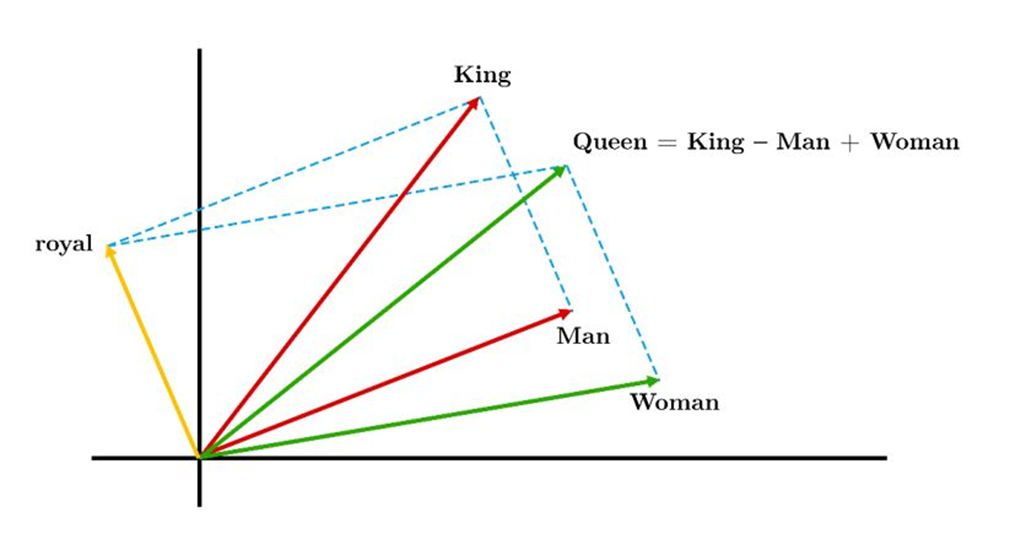

In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import torch
from transformers import AutoTokenizer, AutoModel

input_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/filtered_news_befor_finbert_embeddings.csv"
output_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/filtered_news_with_finbert_embeddings.csv"
error_data = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/filtered_news_error_finbert_embeddings.csv"

if IMPORT_FILES:
    word_embeddings_news = pd.read_csv(output_path, low_memory=False)
        
    # Drop NaN rows and remove unwanted columns
    word_embeddings_news = word_embeddings_news.dropna().loc[:, ~word_embeddings_news.columns.str.contains('^Unnamed')]

else:
    
    # ✅ Ensure progress bars display correctly in Jupyter
    tqdm.pandas()


    # ✅ Chunk size for processing
    chunk_size = 5000

    # **Preprocessing Function**
    def preprocess_text(text):
        if isinstance(text, list):  # If column contains lists of tokens
            text = " ".join(text)  # Convert list to string
        return str(text).strip() if pd.notna(text) else ""

    # **Function to generate FinBERT sentence embeddings with error handling**
    def generate_finbert_embeddings(text, index):
        if not isinstance(text, str) or text.strip() == "":
            return np.zeros(768)  # FinBERT outputs 768-dimensional embeddings

        try:
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
            with torch.no_grad():
                outputs = finbert_model(**inputs)
                embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Move to CPU before conversion

            return embeddings.squeeze()  # Ensure correct shape
        except Exception as e:
            return f"ERROR: {str(e)}"  # Return error message for logging

    # **Load FinBERT Model & Tokenizer**
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"✅ Using device: {device}")
    tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
    finbert_model = AutoModel.from_pretrained("yiyanghkust/finbert-tone").to(device)
    finbert_model.eval()  # Set to evaluation mode

    # **Process data in chunks**
    error_rows = []  # List to store rows with errors
    error_details = []  # Store error messages

    for chunk_index, chunk in enumerate(pd.read_csv(input_path, chunksize=chunk_size)):
        print(f"✅ Processing chunk {chunk_index + 1}...")

        # Preprocess the text data (article and title)
        chunk['article'] = chunk['article'].apply(preprocess_text)
        chunk['title'] = chunk['title'].apply(preprocess_text)

        try:
            # Generate FinBERT Embeddings with progress bars
            chunk['article_embeddings'] = chunk.progress_apply(
                lambda row: generate_finbert_embeddings(row['article'], row.name), axis=1
            )
            chunk['title_embeddings'] = chunk.progress_apply(
                lambda row: generate_finbert_embeddings(row['title'], row.name), axis=1
            )

            # Identify and log problematic rows
            errors_in_chunk = chunk[chunk['article_embeddings'].astype(str).str.startswith("ERROR")]
            if not errors_in_chunk.empty:
                error_rows.append(errors_in_chunk.drop(columns=['article_embeddings', 'title_embeddings']))
                error_details.append(errors_in_chunk[['article_embeddings', 'title_embeddings']])

            # Replace error messages with default zero embeddings
            chunk.loc[chunk['article_embeddings'].astype(str).str.startswith("ERROR"), 'article_embeddings'] = list(np.zeros(768))
            chunk.loc[chunk['title_embeddings'].astype(str).str.startswith("ERROR"), 'title_embeddings'] = list(np.zeros(768))

            # Save chunk to output file immediately (without extra unnamed columns)
            chunk.to_csv(output_path, mode='a', header=(chunk_index == 0), index=False)
            print(f"✅ Chunk {chunk_index + 1} processed and saved.")

        except Exception as e:
            print(f"⚠️ Critical Error processing chunk {chunk_index + 1}: {str(e)}")

    # **Save error data if found**
    if error_rows:
        error_df = pd.concat(error_rows, ignore_index=True)
        error_details_df = pd.concat(error_details, ignore_index=True)
        error_df.to_csv(error_data, index=False)
        print(f"⚠️ Errors found in {len(error_rows)} chunks. Check '{error_data}' for details.")

    # **Move model to CPU and free GPU memory**
    finbert_model.to("cpu")
    del finbert_model
    torch.cuda.empty_cache()  # Free GPU memory

    print("✅ Processing complete.")

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure embeddings are properly extracted
article_embeddings = np.array([np.fromstring(str(embedding).strip("[]"), sep=' ') 
                               for embedding in word_embeddings_news['article_embeddings']])
title_embeddings = np.array([np.fromstring(str(embedding).strip("[]"), sep=' ') 
                             for embedding in word_embeddings_news['title_embeddings']])

# Check dimensions before applying PCA
print(f"Article embeddings shape: {article_embeddings.shape}")
print(f"Title embeddings shape: {title_embeddings.shape}")

# Ensure PCA components don't exceed feature size
n_components = min(3, article_embeddings.shape[1])

# Reduce dimensions using PCA
article_embeddings_3d = PCA(n_components=n_components).fit_transform(article_embeddings)
title_embeddings_3d = PCA(n_components=n_components).fit_transform(title_embeddings)

# Create a 1x2 grid for the plots
fig, axs = plt.subplots(1, 2, figsize=(24, 8), subplot_kw={'projection': '3d'})

# Plot 3D embeddings for articles
axs[0].scatter(article_embeddings_3d[:, 0], article_embeddings_3d[:, 1], article_embeddings_3d[:, 2], color='blue', label='Articles')
axs[0].set_title("3D Word Embeddings for Articles")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].set_zlabel("Z")
axs[0].legend()

# Plot 3D embeddings for titles
axs[1].scatter(title_embeddings_3d[:, 0], title_embeddings_3d[:, 1], title_embeddings_3d[:, 2], color='green', label='Titles')
axs[1].set_title("3D Word Embeddings for Titles")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].set_zlabel("Z")
axs[1].legend()

plt.tight_layout()
plt.show()

#### Dimensionality Reduction and Visualization of Word Embeddings
To better understand the structure and distribution of our word embeddings, we applied Principal Component Analysis (PCA) to reduce the high-dimensional embeddings into a 3D representation. We used sklearn.decomposition.PCA to transform both the article and title embeddings into their top 3 principal components. These embeddings were originally stored as strings in a column format and were parsed using NumPy for compatibility. The PCA process ensures that the most significant variances in the data are retained, even after dimensionality reduction. We then plotted both sets of 3D embeddings using Matplotlib’s 3D scatter plot, where article embeddings were visualized in blue and title embeddings in green, across a 1×2 subplot layout.

The visualized plots revealed intriguing patterns. While the embeddings are widely scattered, they also display densely clustered regions, suggesting that the vector representations are capturing meaningful groupings or themes within the textual data. This balance between spread and density hints at a healthy degree of semantic diversity (wide scatter) and topic cohesion (dense clusters), indicating that our embedding strategy is likely effective. Such visual confirmation adds confidence in the downstream use of these embeddings—for example, as inputs to LSTM models in sentiment or trend prediction tasks.

#Plot the embeddings

In [ ]:
import pandas as pd
import numpy as np
import pandas_market_calendars as mcal
from datetime import datetime
import sys

loc_to_delete= [
    'news_df',
    'article_embeddings',
    'title_embeddings',
    'filtered_news',
    'all_articles',
    'all_titles',
    'article_embeddings_3d',
    'title_embeddings_3d',
    'news_counts'
]

for name in loc_to_delete:
    if name in locals():
        del globals()[name]  

gc.collect()

# ---------------------------
# Setup NYSE calendar and date processing
# ---------------------------
# Define the NYSE calendar
nyse = mcal.get_calendar('NYSE')

# Before converting, print columns to check the correct name for date column
print("Columns in word_embeddings_news:", word_embeddings_news.columns.tolist())

# Convert 'Date' column to datetime format (adjust the key if your column name is different)
# Here we assume the column is named "Date". If not, change accordingly.
word_embeddings_news['Date'] = pd.to_datetime(word_embeddings_news['Date'], errors='coerce')

# Drop rows with invalid dates
word_embeddings_news = word_embeddings_news.dropna(subset=['Date'])

# Get the minimum and maximum dates in the data
min_date = word_embeddings_news['Date'].min()
max_date = word_embeddings_news['Date'].max()
print(f"Min Date: {min_date}, Max Date: {max_date}")

# Get valid trading days from the NYSE calendar between min and max dates
trading_days = pd.to_datetime(nyse.valid_days(start_date=min_date, end_date=max_date)).tz_localize(None)

# Extract existing news dates (as a set)
news_dates = set(word_embeddings_news['Date'])

# Find missing trading days (those present in trading_days but not in our data)
missing_days = set(trading_days) - news_dates

# Convert missing days to DataFrame, add year column, and count per year
missing_days_df = pd.DataFrame({'Missing Date': list(missing_days)})
missing_days_df['Year'] = missing_days_df['Missing Date'].dt.year
missing_counts = missing_days_df.groupby('Year').size()

print("Missing trading days per year:")
print(missing_counts)

In [ ]:
import numpy as np
import pandas as pd
import torch
import gc
from transformers import BertTokenizer, BertForSequenceClassification

# **Check for GPU availability**
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Using device: {device}")

# **Load FinBERT model and tokenizer**
tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone").to(device)
model.eval()  # Set model to evaluation mode

def calculate_sentiment_with_finbert(texts, batch_size=32):
    """Processes a batch of texts using FinBERT and returns sentiment scores."""
    scores = []
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        
        # Tokenize inputs
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=512
        ).to(device)

        # **Inference without gradient calculation**
        with torch.no_grad():
            outputs = model(**inputs)
            sentiments = torch.nn.functional.softmax(outputs.logits, dim=-1)
            sentiment_scores = sentiments[:, 1].cpu().tolist()  # Extract positive sentiment score
            scores.extend(sentiment_scores)

    return scores

## Calculate sentiment scores for each DataFrame:

### FinBERT-Based Sentiment Analysis
The first aspect to address is the extraction of sentiment, which has become a crucial component in predictive models across various financial studies. Many research efforts incorporate a sentiment score as a standalone textual feature or as part of a larger input vector within the final predictive model. In practice, the sentiment score is the output of a process called sentiment analysis—also known as “opinion mining.” This technique involves examining text such as articles, reviews, and news reports to determine the emotional tone expressed within. One of the significant challenges in this field is the inherent ambiguity of natural language; words are not univocal, and their meaning can shift dramatically based on the context. For instance, the word “hot” could convey positive sentiment when describing a vacation spot, yet it may imply negative sentiment when used to describe an overheating computer. Moreover, the process typically categorizes text into one of three classes: positive, neutral, or negative. In some scenarios, sentiment scores represent not only discrete categories but also the intensity or degree to which a text aligns with a particular sentiment, thereby enabling finer granularity in emotion detection.

To achieve robust and context-specific sentiment signals, modern approaches have increasingly relied on deep learning and transfer learning techniques. FinBERT—a specialized variant of BERT fine-tuned on financial texts—stands as a leading example. FinBERT leverages pre-trained transformer architectures to effectively model complex textual relationships and nuances that traditional machine learning methods might miss. This allows FinBERT to generate sentiment scores that are more attuned to the subtleties of financial language. The significance of sentiment analysis becomes even more pronounced when examining the role of sentiment contagion: the tendency for emotions to spread among individuals or groups, often leading to herd behavior. In financial markets, such contagion can manifest as collective fear during downturns or exuberance during bull markets, significantly impacting trading decisions and market dynamics. Digital platforms further amplify these effects, as algorithms are designed to increase the visibility of trending sentiments.

In our workflow, we utilize FinBERT alongside other NLP tools—such as NLTK, TextBlob, VADER, and spaCy—to preprocess and analyze the text before integrating sentiment scores into our broader analytical framework. By incorporating sentiment analysis at multiple levels (document-level, sentence-level, or aspect-level), we can derive a multifaceted understanding of market sentiment. These insights are then used either as standalone features or in conjunction with numerical data to enhance the accuracy of our financial forecasting models. Importantly, while the complex nature of sentiment analysis presents challenges like context sensitivity, sarcasm detection, and domain-specific word connotations, the use of advanced models like FinBERT mitigates many of these issues, delivering a more precise and reliable sentiment indicator for downstream applications.

Our approach leverages FinBERT, a variant of the BERT model specifically fine-tuned on financial texts to capture sentiment nuances in market-related content. The code begins by checking for GPU availability so that computation can be accelerated when possible. We then load FinBERT and its tokenizer directly from the HuggingFace repository (yiyanghkust/finbert-tone), ensuring that the model is set to evaluation mode to disable gradient calculations during inference.

The function calculate_sentiment_with_finbert processes batches of input texts efficiently: it tokenizes the texts—applying truncation and padding to a maximum length of 512 tokens—and performs inference without computing gradients. The outputs are passed through a softmax function to obtain normalized sentiment probabilities. From these, the positive sentiment score (usually corresponding to the second class) is extracted for each text. This score serves as an indicator of the financial sentiment, which can then be used as an input for further financial analysis or forecasting tasks.

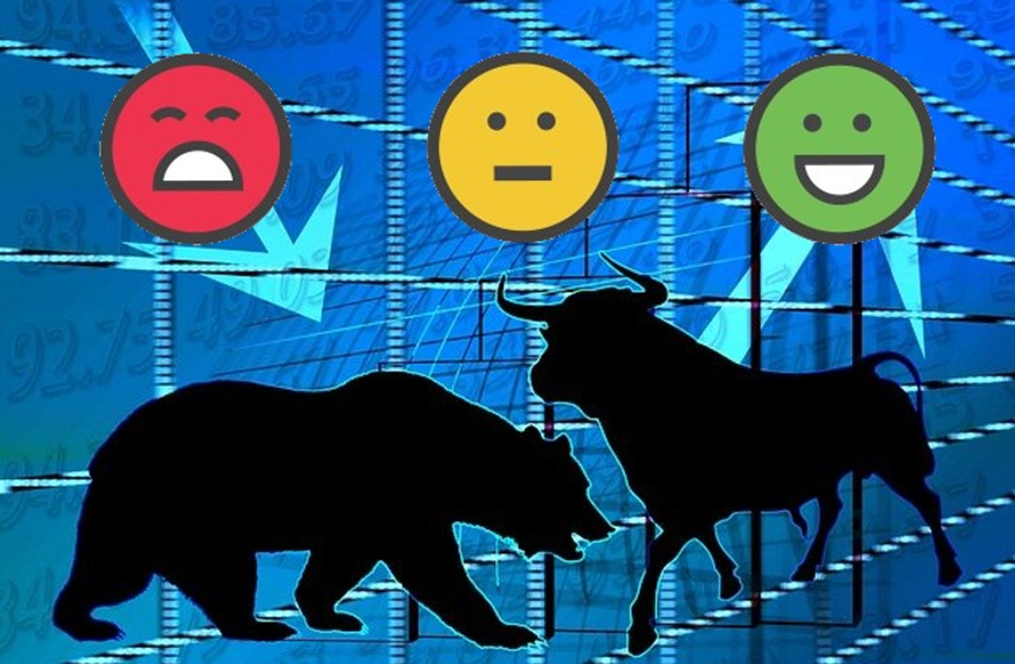

In [ ]:
# **File paths for input and output**
file_paths = {
    "pos": "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/pos_filtered_news_befor_santiment.csv",
    "bigrams": "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/ngrams_filtered_news_befor_santiment.csv",
    "word_embeddings": "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/filtered_news_with_finbert_embeddings.csv"
}

output_paths = {
    name: f"C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/{name}_news_with_sentiment.csv"
    for name in file_paths
}
if IMPORT_FILES:
    for name in names:
        news_dataframes[name] = pd.read_csv(output_paths[name],low_memory=False)
else:
    # **Chunk size for processing**
    chunk_size = 10_000

    # **Process each DataFrame in chunks**
    for name, input_path in file_paths.items():
        output_path = output_paths[name]
        
        print(f"✅ Processing '{name}' dataset...")

        # Read and process the file in chunks
        for chunk_index, chunk in enumerate(pd.read_csv(input_path, chunksize=chunk_size, low_memory=False)):
            print(f"🔹 Processing chunk {chunk_index + 1} for '{name}' dataset...")

            # Drop NaN rows and remove unwanted columns
            chunk = chunk.dropna().loc[:, ~chunk.columns.str.contains('^Unnamed')]

            try:
                # Compute sentiment scores for 'article' and 'title'
                chunk['article_score'] = calculate_sentiment_with_finbert(chunk['article'].tolist(), batch_size=128)
                chunk['title_score'] = calculate_sentiment_with_finbert(chunk['title'].tolist(), batch_size=128)

                # Save processed chunk (append mode to avoid overwriting)
                chunk.to_csv(output_path, mode='a', header=(chunk_index == 0), index=False)
                print(f"✅ Chunk {chunk_index + 1} processed and saved for '{name}' dataset.")

            except Exception as e:
                print(f"⚠️ Error processing chunk {chunk_index + 1} for '{name}': {str(e)}")

            # Free memory after each chunk
            gc.collect()

    # **Free GPU memory after processing all datasets**
    model.to("cpu")
    del model
    torch.cuda.empty_cache()

    print("✅ All datasets processed successfully.")

Parsing for Word embeddings vectors that loads from text(csv)

In [ ]:
import pandas as pd
import numpy as np
import ast
import re

def parse_embedding(s):
    """
    Convert an embedding string into a numpy array.
    If the string is well-formed (e.g., with commas), ast.literal_eval works.
    If commas are missing (e.g., "[1.0 2.0 3.0]"), we split on whitespace.
    """
    if not isinstance(s, str):
        return None
    s = s.strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            # First try the literal_eval (works if commas are present)
            return np.array(ast.literal_eval(s), dtype=np.float32)
        except Exception:
            # If that fails, try splitting on whitespace
            inner = s[1:-1].strip()
            # Split by any whitespace
            parts = re.split(r'\s+', inner)
            try:
                return np.array([float(x) for x in parts], dtype=np.float32)
            except Exception:
                return None
    return None

## remove last Rows to lower dimantions 

Now that we finished with calculating WE and we can remove the columns that are not relevant to our prediction(i.e 'month', 'day', 'title', 'article')


In [ ]:
import pandas as pd
import numpy as np
import ast
import re

news_dataframes = {}
names = ['pos', 'bigrams', 'word_embeddings']

ticker_mapping = {'APPLE': 'AAPL', 'AMAZON': 'AMZN', 'NETFLIX': 'NFLX'}

output_paths = {name: f"C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/{name}_news_with_sentiment.csv" for name in names}

for name in names:
    print(f"Processing {name}...")
    
    # Load data
    df = pd.read_csv(output_paths[name], low_memory=False)
    
    # Convert article_score and title_score to float32 if available
    for col in ['article_score', 'title_score']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype(np.float32)
    
    # Drop unnecessary columns and rows with missing data
    df.drop(columns=['month', 'day', 'title', 'article'], errors='ignore', inplace=True)
    df.dropna(inplace=True)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    
    # Standardize Tickers
    df['Ticker'] = df['Ticker'].str.strip().str.upper().replace(ticker_mapping)
    
    # --- If WE dataframe, parse embeddings for all rows ---
    if name == 'word_embeddings':
        for col in ['article_embeddings', 'title_embeddings']:
            if col in df.columns:
                df[col] = df[col].apply(parse_embedding)
    
    # --- Aggregate GENERAL rows from the original df ---
    general_df = df[df['Ticker'] == 'GENERAL'].copy().reset_index(drop=True)
    
    # For scores aggregation (applies to all dfs)
    general_scores = general_df.groupby('Date', as_index=False).agg({
        'article_score': 'mean',
        'title_score': 'mean'
    }).rename(columns={
        'article_score': 'mean_general_article_score',
        'title_score': 'mean_general_title_score'
    })
    
    # For word embeddings, also aggregate embeddings from GENERAL rows
    if name == 'word_embeddings':
        # Remove any rows where embeddings could not be parsed
        general_df = general_df.dropna(subset=['article_embeddings', 'title_embeddings'])
        
        # Group by Date to compute mean embeddings
        general_embeddings = general_df.groupby('Date', as_index=False).agg({
            'article_embeddings': lambda x: np.mean(np.vstack(x), axis=0),
            'title_embeddings': lambda x: np.mean(np.vstack(x), axis=0)
        })
        # Rename columns for clarity
        general_embeddings.rename(columns={
            'article_embeddings': 'mean_general_article_embeddings',
            'title_embeddings': 'mean_general_title_embeddings'
        }, inplace=True)
        
        # Merge the embeddings with the general scores
        general_agg = general_scores.merge(general_embeddings, on='Date', how='left')
    else:
        general_agg = general_scores.copy()
    
    # --- Remove GENERAL rows from the main dataframe ---
    df = df[df['Ticker'] != 'GENERAL'].copy()
    
    # --- Merge aggregated GENERAL features into the main df ---
    df = df.merge(general_agg, on='Date', how='left')
    
    # Fill missing scores with 0
    df['mean_general_article_score'] = df['mean_general_article_score'].fillna(0).astype(np.float32)
    df['mean_general_title_score'] = df['mean_general_title_score'].fillna(0).astype(np.float32)
    
    # For WE df, also fill missing embeddings with zeros of proper shape.
    if name == 'word_embeddings':
        # Determine embedding dimension:
        emb_dim = None
        if 'mean_general_article_embeddings' in df.columns:
            sample_series = df['mean_general_article_embeddings'].dropna()
            if not sample_series.empty:
                sample = sample_series.iloc[0]
                emb_dim = len(sample) if isinstance(sample, np.ndarray) else None
        if emb_dim is None and 'article_embeddings' in df.columns:
            sample = df['article_embeddings'].iloc[0]
            if isinstance(sample, str):
                sample = parse_embedding(sample)
            emb_dim = len(sample) if sample is not None else 300  # default fallback
        if emb_dim is None:
            emb_dim = 300
        
        # Fill missing aggregated embeddings with zeros
        for col in ['mean_general_article_embeddings', 'mean_general_title_embeddings']:
            if col in df.columns:
                df[col] = df[col].apply(lambda x: x if isinstance(x, np.ndarray) else np.zeros(emb_dim, dtype=np.float32))
    
    news_dataframes[name] = df
    
    print(df.describe(include='all'))
    print("-" * 50)

# Financial data


 Integrating Technical and Linguistic Data for Stock Trend Predictions

The integration of multiple data modalities has become a powerful strategy in financial forecasting. In particular, the combination of **technical indicators** with **natural language processing (NLP)** insights allows models to capture both quantitative trends and qualitative sentiment. Within this approach, two major schools of thought have emerged in the research landscape.

---

#### Dual Approaches in Financial NLP Research

##### 1. **Technical + Textual Data Integration**

The first school of thought emphasizes **combining traditional financial indicators**—such as opening and closing prices—with **text-based features** derived from sentiment analysis and other NLP techniques.

Technical indicators have long been trusted by expert analysts and traders for identifying price movements and developing trading strategies. These include well-established tools such as moving averages and momentum indicators. However, one drawback of purely technical approaches is their **lag in responsiveness to market sentiment**, especially during periods of high volatility or sudden news events.

To address this limitation, researchers began **enhancing these models with textual sentiment features**, derived from financial news, social media, and structured sentiment datasets. The goal is to leverage the **immediacy and psychological insights** that NLP can offer, thereby improving model adaptability and predictive accuracy.

##### 2. **Text-Only Approaches**

The second school focuses solely on **linguistic data**, harnessing user-generated content from financial platforms such as **StockTwits**—a microblogging platform launched in 2008, which has amassed over **150 million messages from more than 100,000 users**.

On StockTwits, users can **self-classify messages** as “bullish” (positive) or “bearish” (negative), providing a **rich source of labeled sentiment data**. In AI and machine learning, **labeling** is the process of categorizing data into predefined classes, especially useful for **supervised learning** tasks like classification.

These textual-only approaches depend heavily on the **quality, frequency, and contextual reliability** of the sentiment source. When paired with well-structured labels, such datasets can produce strong predictive signals, especially in rapidly evolving markets where sentiment often leads price movement.

---

#### Key Technical Indicators Used in Forecasting

Below are common financial indicators frequently used in stock trend prediction, especially within the first school of thought that integrates them with textual sentiment:

---

##### **Relative Strength Index (RSI)**

- **Purpose**: Identifies overbought or oversold market conditions.
- **Calculation**: Based on the ratio of average gains to average losses over a 14-day period.
- **Scale**: 0–100  
  - RSI > 70 → Overbought  
  - RSI < 30 → Oversold
- **Use**: Traders use RSI to time market entries and exits, anticipating reversals or consolidations.

---

##### **Simple Moving Average (SMA)**

- **Purpose**: Smooths out price data to identify long-term trends.
- **Calculation**: Arithmetic mean of prices over a defined window (e.g., 50 or 200 days).
- **Use**: Detects bullish or bearish trends depending on price crossover points.

---

##### **Exponential Moving Average (EMA)**

- **Purpose**: Similar to SMA but more sensitive to recent price changes.
- **Calculation**:  
  \[
  EMA_t = (Price_t \times α) + EMA_{t-1} \times (1 - α)
  \]  
  where \(α\) is the **smoothing factor**.
- **Use**: Faster reaction to market changes, often paired with SMA for **crossover strategies**.

---

##### **Moving Average Convergence Divergence (MACD)**

- **Purpose**: Measures momentum by comparing two EMAs (12-period and 26-period).
- **Calculation**:  
  \[
  MACD = EMA_{12} - EMA_{26}
  \]  
  Signal line: 9-period EMA of MACD.
- **Use**: Detects **bullish** (upward momentum) or **bearish** (downward momentum) divergences.

---

##### **On-Balance Volume (OBV)**

- **Purpose**: Evaluates buying/selling pressure by summing up trading volume.
- **Use**: Confirms trend strength based on volume direction.

---

##### **Adjusted Closing Price**

- **Purpose**: Accounts for dividends, stock splits, and corporate actions.
- **Use**: Provides a more accurate reflection of a stock’s value over time for historical analysis.

---

##### Augmenting Technical Data with NLP Features

Researchers have enriched technical datasets by adding **textual features**, such as:

- **Sentiment Score** (positive, neutral, negative)
- **Subjectivity Score** (subjective vs. objective)
- **Positive/Negative Word Count**
- **Total Word Count**

These are extracted using models like **VADER, TextBlob, spaCy**, or more advanced ones like **FinBERT**.

---

##### Example: Multi-Source Textual Data

A notable example combined data from **multiple text sources**:

- **~29,000 Tweets** (over 9 years) about:
  - **Google (GOOG)**
  - **Nvidia (NVDA)**
  - **Apple (AAPL)**
  - Plus the **S&P Information Technology Sector Index**
- **Financial PhraseBank**:
  - 5,000 labeled sentences from financial news
  - Labeled by experts from Finnish banks
  - Tags include positive, neutral, and negative sentiments
- **Financial News Corpus**:
  - **2.7 million articles (~9.2 GB)** from publishers like CNN and Reuters
  - Extracted fields: `date`, `author`, `title`, `content`, `URL`, `ad snippet`

Sentiment scores derived from these datasets were integrated with technical features to **build hybrid predictive models**.

For instance, some studies sampled a **single headline per trading day** for each stock and computed a sentiment score to complement the technical indicators—highlighting how textual and technical data can be seamlessly combined to improve model performance.

---

#### Yahoo Finance Review

##### Overview

**Yahoo Finance** is one of the most popular platforms for financial news, stock tracking, and analysis. It caters to both casual investors and professional traders.

---
##### Comprehensive Data

- Stock quotes, financial news, company profiles, and balance sheets.
- Useful for quick stock research or long-term monitoring.

##### User-Friendly Interface

- Clean layout.
- Easy to navigate for beginners and pros alike.

##### Free Basic Features

- Many tools are free to use.
- Suitable for casual users or learners.

##### Limited Advanced Features

- In-depth analysis tools (e.g., charting, third-party research) are locked behind the paywall.

---

##### Yahoo Finance Premium (Plus)

Yahoo offers a **premium service**, Yahoo Finance Plus, for advanced users.

##### Features

- **Advanced Technical Charting** – Better tools for professional analysis.
- **Portfolio Management Tools** – Track and optimize your investments.
- **Third-Party Research Access** – Reports from **Morningstar**, **Argus**, etc.
- **Daily Trade Ideas** – Personalized recommendations based on your activity.

##### Conclusion

Yahoo Finance remains a **robust and versatile platform** for financial analysis. While the free version is highly functional for most retail investors, the **premium subscription adds significant value** for those seeking deeper insights and decision-making tools.

---

Let me know if you'd like this broken into separate sections for a paper or presentation format, or converted into LaTeX, Word, or PDF.

In [ ]:
import os
import yfinance as yf
all_data_file_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/all_stocks_data.csv"

if IMPORT_FILES:
    # Load the stock data
    financial_data = pd.read_csv(all_data_file_path)
    
    # Convert Date column to datetime
    financial_data['Date'] = pd.to_datetime(financial_data['Date'])
    
    # Standardize Tickers (trim spaces, convert to uppercase)
    financial_data['Ticker'] = financial_data['Ticker'].str.strip().str.upper()

else:
    # Define the list of stock symbols and date range
    stocks = ["AAPL", "AMZN", "NFLX"]
    start_date = "2016-01-01"
    end_date = "2020-12-31"
    stock_data_path = "C:/Users/argam/Documents/GitHub/FinTrendLSTM/data"

    # Add a directory to save the dataframes
    data_frames = {}

    # Ensure the save path exist
    os.makedirs(stock_data_path, exist_ok=True)

    # Loop through the stocks and download the data
    for stock in stocks:
        data = yf.download(stock, start=start_date, end=end_date)

        # Reset the index to make Date a column
        data.reset_index(inplace=True)

        # Add the Ticker column
        data['Ticker'] = stock   

        #print all the unfolded lyres of the dataframe loop ovrer data and unfold it
        data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

        # rename the columns bu rmoving the everythign after the underscore including the underscore
        data.columns = [col.split("_")[0] for col in data.columns]

        # Keep only necessary columns
        data = data[["Ticker", "Date", "Open", "Close", "High", "Low", "Volume"]]

        # Add the data to the dictionary
        data_frames[stock] = data

        # Save the data to a CSV file
        file_path = os.path.join(stock_data_path, f"{stock}_stock_data.csv")
        data.to_csv(file_path, index=False)
        
    # combine all the dataframes into a single dataframe
    for stock, data in data_frames.items():
        if stock == stocks[0]:
            all_data = data
        else:
            all_data = pd.concat([all_data, data], ignore_index=True, axis=0)

    # Save the combined data to a CSV file
    all_data.to_csv(all_data_file_path, index=False)



In [ ]:
import pandas as pd

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)  

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Function to calculate SMA
def calculate_sma(data, window=14):
    return data.rolling(window=window, min_periods=1).mean()

# Function to calculate Stochastic Oscillator %K
def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window, min_periods=1).min()
    high_max = data['High'].rolling(window=window, min_periods=1).max()
    stochastic_k = 100 * (data['Close'] - low_min) / (high_max - low_min)
    return stochastic_k

# Ensure each financial metric is calculated per stock ticker
financial_data['RSI'] = financial_data.groupby('Ticker')['Close'].transform(calculate_rsi)
financial_data['SMA'] = financial_data.groupby('Ticker')['Close'].transform(calculate_sma)

# Fix for Stochastic Oscillator %K to return a Series, avoiding the ValueError
financial_data['%K'] = financial_data.groupby('Ticker', group_keys=False)['Close'].transform(
    lambda x: calculate_stochastic_oscillator(financial_data.loc[x.index], window=14)
)

# ✅ **Fix: Correct `Class` Calculation for Regression**
financial_data['Class'] =  financial_data['Close'] - financial_data['Open']

# ✅ **Fix: Normalize Prices**
financial_data['Close'] = financial_data.groupby('Ticker')['Close'].transform(lambda x: (x - x.mean()) / x.std())
financial_data['Open'] = financial_data.groupby('Ticker')['Open'].transform(lambda x: (x - x.mean()) / x.std())
financial_data['High'] = financial_data.groupby('Ticker')['High'].transform(lambda x: (x - x.mean()) / x.std())
financial_data['Low'] = financial_data.groupby('Ticker')['Low'].transform(lambda x: (x - x.mean()) / x.std())

# Debugging: Print min/max values
print(financial_data[['Close', 'Class']].describe())

# Display the first few rows for each column; for 'Ticker' print all unique values
for col in financial_data.columns:
    if col == 'Ticker':
        temp = financial_data[col].unique()
        print(f'{col} :', temp)
        del temp  # Remove temporary variable
    else:
        print(f'{col} :', financial_data[col].min(), financial_data[col].max())

**Financial Data Summary**

The dataset now includes three tickers (`AAPL`, `AMZN`, `NFLX`) spanning from `2016-01-04` to `2020-12-30`. After normalization and indicator calculation, a total of 3,774 records are available. The normalized price features (`Open`, `Close`, `High`, `Low`) exhibit standard Z-score behavior with means near zero and standard deviations close to one. The computed target variable, `Class` (defined as the normalized `Close` minus the normalized `Open`), ranges between approximately -0.33 and 0.42, reflecting relatively small differences after normalization. In addition, the Relative Strength Index (RSI) varies from 0.0 to about 96.20, the Simple Moving Average (SMA) spans from roughly -1.41 to 2.98, and the Stochastic Oscillator %K varies from approximately -69.47 to 280.99. The `Volume` feature shows a limited range from 0.0 to 1.0, suggesting that it may be unnormalized or scaled differently from the price features.

**Descriptive Statistics**

| Feature   | Count | Mean    | Std  | Min   | 25%    | 50%    | 75%    | Max   |
|-----------|-------|---------|------|-------|--------|--------|--------|-------|
| **Close** | 3774  | ~0.00   | 1.00 | -1.46 | -0.87  | -0.07  | 0.53   | 3.27  |
| **Class** | 3774  | ~0.00   | 0.04 | -0.33 | -0.013 | -0.00012 | 0.014 | 0.42  |

**Column Ranges**

| Column   | Min      | Max      |
|----------|----------|----------|
| `Open`   | -1.47    | 3.32     |
| `Close`  | -1.46    | 3.27     |
| `High`   | -1.45    | 3.27     |
| `Low`    | -1.47    | 3.25     |
| `Volume` | 0.0      | 1.0      |
| `RSI`    | 0.0      | 96.20    |
| `SMA`    | -1.41    | 2.98     |
| `%K`     | -69.47   | 280.99   |
| `Class`  | -0.33    | 0.42     |

### Normalization
is a data preprocessing technique used to scale numerical values into a standard range, commonly either [0, 1] or [-1, 1]. This is especially critical when working with machine learning models, which are sensitive to the magnitude and variance of input features.

**Why Normalize?**
Equal Feature Influence: Prevents features with larger numeric scales (e.g., Volume in millions) from dominating smaller-scaled features (e.g., RSI in 0–100).

Improved Training Stability: Helps optimization algorithms like gradient descent converge faster and more stably.

Algorithm Compatibility: Some models (e.g., neural networks, SVMs) assume inputs are scaled or centered.

Better Interpretability: Makes it easier to compare the influence of different features.

**Types of Normalization Used**
**Min-Max Normalization (0 to 1)**
This technique transforms values to the range [0, 1]. It’s useful when:

Features must remain non-negative.

You want to preserve the original data distribution (shape).

Your model is sensitive to scale, like neural networks using ReLU activations.

**Scaled Min-Max Normalization (-1 to 1)**
This is an adjusted version of min-max normalization that rescales values to [-1, 1]. It is particularly helpful when:

Your model uses tanh activations (which output values in [-1, 1]).

You want zero-centered features for symmetry.

Your target variable (like a Class label) has both negative and positive values.

**How the Process Works**
Feature Selection: Specific columns are chosen for either 0–1 or -1–1 scaling based on their nature.

Technical indicators like Volume, RSI, SMA, and %K are scaled between 0 and 1.

The Class column (used for classification) is scaled to -1 to 1 to maintain zero-centered balance.

Application of Normalization: Each feature is normalized using vectorized operations. The formulas ensure that:

The minimum value becomes the lower bound (0 or -1),

The maximum value becomes the upper bound (1 or 1),

All values in between are proportionally scaled.

Memory Optimization: After scaling, all numerical columns (excluding non-numeric ones like Date and Ticker) are cast to float32. This:

Reduces memory usage, especially in large datasets.

Improves performance on GPU-based frameworks like TensorFlow or PyTorch.

Sanity Check: A descriptive summary of the normalized columns is printed to ensure the transformation worked correctly. You should expect:

Values in [0, 1] for indicators.

Values in [-1, 1] for class labels.

Means and standard deviations that reflect the normalized spread.

**Summary**
Type	Used For	Value Range	Benefits
Min-Max Normalization	Volume, RSI, SMA, %K	[0, 1]	Keeps values non-negative and preserves original shape
Scaled Min-Max (-1 to 1)	Class (label/target)	[-1, 1]	Makes data zero-centered; ideal for tanh-based models
Float Conversion	All numeric features	float32	Saves memory, enhances ML framework compatibility


In [ ]:
# Normalize function to scale 0 to 1
def normalize_zero(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize function to scale -1 to 1
def normalize_minus_one(column):
    return 2 * ((column - column.min()) / (column.max() - column.min())) - 1

# Columns that still need normalization
zero_normalized_columns = ['Volume', 'RSI', 'SMA', '%K']
minus_one_normalized_columns = ['Class']

# Apply normalization
for col in zero_normalized_columns:
    financial_data[col] = normalize_zero(financial_data[col])

for col in minus_one_normalized_columns:
    financial_data[col] = normalize_minus_one(financial_data[col])

# Convert columns to float32 for memory efficiency
for col in financial_data.columns:
    if col not in ['Date', 'Ticker']:
        financial_data[col] = financial_data[col].astype(np.float32)

# Debug print
print(financial_data[['Volume', 'RSI', 'SMA', '%K', 'Class']].describe())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Columns to plot (excluding Date and Ticker)
columns_to_plot = [col for col in financial_data.columns if col not in ['Date', 'Ticker']]
num_columns = 3  # 3 plots per row
num_rows = math.ceil(len(columns_to_plot) / num_columns)  # Auto-adjust rows

# Get unique tickers and assign each a color
unique_tickers = financial_data['Ticker'].unique()
palette = sns.color_palette("husl", len(unique_tickers))  # Generate unique colors

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten for easier indexing

# Generate violin plots with hue to suppress the warning
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.violinplot(
        data=financial_data,
        x='Ticker',
        y=col,
        hue='Ticker',
        dodge=False,
        ax=ax,
        palette=palette
    )
    ax.set_title(f"{col} Distribution by Stock")
    ax.set_xlabel("Stock")
    ax.set_ylabel(col)
    # Remove legend for clarity (legend duplicates x-axis labels)
    if ax.get_legend():
        ax.get_legend().remove()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The Open, Close, High, and Low prices for each stock exhibit a remarkable level of alignment, showcasing a consistent pattern across the dataset. This consistency is crucial for reliable analysis and forecasting. In the volume section, we observe a clear hierarchy in trading activity: AAPL trades significantly more than AMZN, which in turn trades more than NFLX. This indicates AAPL's higher liquidity and market interest compared to the other stocks.

When examining the RSI (Relative Strength Index), we notice that most stocks, except AAPL, remain within the 70-30 range. This suggests that AMZN and NFLX are generally not in an oversold or overbought state, reflecting a balanced market sentiment. On the other hand, AAPL frequently enters the overbought territory, indicating strong buying pressure and potential for price corrections.

Lastly, the Class section reveals a stable market environment. The graph trends hover around 0, suggesting that the market movements are relatively neutral and not exhibiting extreme volatility. This stability is essential for investors seeking predictable and steady returns.

### Setting final merged data frame

In [ ]:
# Combain the news and financial data
# First we will get one line per date per stock by taking the mean of the article and title scores
# Then we will merge the news and financial data on the date and stock ticker keeping only the financial data and 
# article and title scores
# we will save the new data frames in a dictionary so we will have a unique data frame for each preprocessed strategy
# at the moment we will not use the word embeddings as it is not clear how to combine the data
from sklearn.decomposition import PCA
import os

final_dataframes = {}

for name, df in news_dataframes.items():
    # Merge general news mean values into the main dataset
    df = df.merge(financial_data, on=['Date', 'Ticker'], how='left')

    #Save the data frame as a csv file
    # output_file_path = f"C:/Users/argam/Documents/GitHub/FinTrendLSTM/data/{name}_news_with_financial_data.csv"
    # df.to_csv(output_file_path, index=False)
    final_dataframes[name] = df


In [ ]:
import numpy as np

ticker_map = {'AAPL': '1', 'AMZN': '2', 'NFLX': '3'}

for name, data in final_dataframes.items():
    data['Ticker'] = data['Ticker'].replace(ticker_map)
    data['Ticker'] = data['Ticker'].astype('float32')
    data.fillna(0, inplace=True)
    
    
    for col in data.columns:
        if "embeddings" in col:
            sample = data[col].iloc[0]  # Get first element
            if isinstance(sample, np.ndarray):
                print(f"{col} {data[col].dtype}: NumPy array with shape {sample.shape}")
            else:
                print(f"{col} {data[col].dtype}: ❌ NOT NumPy (type: {type(sample)}")
        else:
            print(f"{col} : {data[col].dtype}")
    
    print("\n")  # Add tab spacing per data frame

f_pos_news = final_dataframes['pos']
f_bigrams_news = final_dataframes['bigrams']
f_word_embeddings_news = final_dataframes['word_embeddings']

Since we aim to build an LSTM model for stock trend prediction based on a 5-day time window, each input at day_t
t will be a vector of daily features. The model will process batches of stock data, utilizing an embedding layer, and predict whether the trend is up (1) or down (0). Each day will aggregate all the date-stock rows for that day, so each row-feature pair becomes a feature in the aggregated data.

To ensure our data is well-prepared for this model, we will first examine the distribution of the row counts for each stock in each data frame. This step is crucial as it helps us understand the volume and consistency of data available for each stock, ensuring that our model has sufficient and balanced input data for accurate predictions.

We will load the data frames for AAPL, AMZN, NFLX, and the combined data set, and then calculate the number of rows for each. This will give us a clear picture of the data distribution and help us identify any potential imbalances or gaps that need to be addressed before training our LSTM model.

In [ ]:
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

for name, data in final_dataframes.items():
    # Define the NYSE calendar
    nyse = mcal.get_calendar('NYSE')

    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Define date range
    start_date = data['Date'].min()
    end_date = data['Date'].max()

    # Check if any rows in 'data' are outside the valid date range
    print(f"{name} date range: {data['Date'].min()} to {data['Date'].max()}")

    # Group by 'Date' and 'Ticker' to count articles per day per stock
    news_counts = data.groupby(['Date', 'Ticker']).size().unstack(fill_value=0)

    # Get valid trading days from the NYSE calendar
    trading_days = pd.to_datetime(nyse.valid_days(start_date=start_date, end_date=end_date))

    # Remove any timezone information from trading_days to match data dates
    trading_days = trading_days.tz_localize(None)

    # Reindex to ensure all trading days are present (fill missing with 0)
    news_counts = news_counts.reindex(trading_days, fill_value=0)

    # Remove "noisy" data: Set values greater than 150 to NaN (or 0)
    news_counts[news_counts > 150] = 0

    # Count the number of days with 0 articles for at least one ticker
    days_with_no_articles = (news_counts == 0).any(axis=1).sum()

    # Print the count of days with zero articles for at least one ticker
    print(f"Number of days with zero articles for at least one ticker: {days_with_no_articles}")

    # Get tickers
    tickers = news_counts.columns.tolist()

    # Set up subplot grid (2x2 for up to 4 tickers)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.flatten()

    # Iterate over tickers and plot
    for i, ticker in enumerate(tickers[:4]):  # Ensure we only plot up to 4 tickers
        ax = axes[i]
        sns.histplot(news_counts[ticker], bins=20, kde=False, ax=ax, color='blue')
        
        # Calculate statistics
        avg = news_counts[ticker].mean()
        median = news_counts[ticker].median()
        min_articles = news_counts[ticker].min()
        max_articles = news_counts[ticker].max()
        days_below_avg = (news_counts[ticker] < avg).sum()
        days_below_median = (news_counts[ticker] < median).sum()
        
        # Plot vertical lines for average and median
        ax.axvline(avg, color='red', linestyle='--', label=f'Avg: {avg:.1f}')
        ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
        
        # Labels and title
        ax.set_title(f"Rows per Day on - {ticker}")
        ax.set_xlabel("Number of Articles")
        ax.set_ylabel("Trading Days")
        ax.legend()
        
        # Print stats
        print(f"{ticker} - Days below Avg: {days_below_avg}, Days below Median: {days_below_median}, Min: {min_articles}, Max: {max_articles}")

    # Remove unused subplots if there are fewer than 4 tickers
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print(len(data))


## The Models

### RNN & LSTM:
The model is a neural network architecture designed to work with sequential and continuous data [5]. Sequential data can be a series of time points, events, sentences, or words of varying lengths – in general, any data whose length is not fixed. This characteristic makes the Recurrent Neural Network (RNN) a natural choice for tasks such as natural language processing, time series prediction, speech recognition, and more. Many models developed to accurately predict trends in the stock market have been based on RNNs [1]. The underlying idea behind the architecture is the repetition and copying of the model—including the arcs and weights—where each layer in the network receives two inputs. The new input (the $i$th) fed into the network is identical to the network of the previous input ($i-1$) along with the output from the hidden layer of that previous input. This architecture allows information from previous time steps to affect future outputs and produces a relatively simple model since to process a new input, all that is needed is to copy the network, connect it, and feed in the pair of inputs.

The theoretical structure is built from an input layer that receives a sequence 

$$
x = (x_1, x_2, \dots, x_T)
$$

The model computes the hidden state $h_t$ for each time step $t$, from which an output $y_t$ is produced—typically using the following update formula:

$$
h_t = W_{hx} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h
$$

where  
- $h_t$ is the hidden state at time step $t$,  
- $W_{hx}$ is the input-to-hidden weight matrix,  
- $W_{hh}$ is the hidden-to-hidden weight matrix,  
- $x_t$ is the input at time step $t$,  
- $h_{t-1}$ is the previous hidden state,  
- $b_h$ is the bias term for the hidden state, and  
- $\sigma$ is an activation function (e.g., $\tanh$ or ReLU).

The output is computed as follows:

$$
y_t = W_{hy} \cdot h_t + b_y
$$

where  
- $y_t$ is the output at time step $t$,  
- $W_{hy}$ is the hidden-to-output weight matrix, and  
- $b_y$ is the bias term for the output.

However, RNNs tend to suffer from the "vanishing/exploding gradient" problem. During training, the gradient of the loss function can either vanish or explode [1]. This issue makes it challenging for RNNs to work with long sequences and to effectively capture long-term dependencies because it is rooted in the way the network's weights are computed. An additional challenge lies in the sequential nature of RNNs that leads to slow training since each step depends on the previous one—the input of step $n$ must wait for the hidden layer output of step $n-1$.

Long Short-Term Memory (LSTM) networks have long been used as an alternative to basic RNNs for time series prediction tasks due to their superiority in handling the vanishing gradient problem, particularly over longer sequences, and their improved ability to capture long-term dependencies [1]. The architecture is built on "cells," where each cell receives one component as input along with the output from the previous cell, much like in an RNN. Each LSTM cell maintains a cell state $C_t$ that acts like a conveyor belt, preserving information over the long term. Within each cell, the cell state is updated using linear operations—such as multiplications and additions—performed inside the cell, thereby reducing the risk of gradient vanishing. Additionally, each cell incorporates "gates" that control the flow of information between cells and within the cell itself by employing weighted functions. The gates include a forget gate, which determines the extent to which information should be discarded from the cell state; an input gate, which controls how much new information should be stored; and finally, an output gate, which determines how much information is released from the cell state. This design enables the model to selectively "forget" or "remember" information from particularly long sequences. Such properties explain why the model is well suited for tasks like language modeling, text generation, and stock market prediction. The different components of the model are computed as follows:

The **forget gate** is defined by

$$
f_t = \sigma\Big(W_f \cdot \big[h_{t-1}, x_t\big] + b_f\Big)
$$

where $f_t$ is the forget gate activation at time step $t$, $W_f$ is the forget gate weight matrix, $h_{t-1}$ is the previous hidden state, $x_t$ is the input at time step $t$, $b_f$ is the bias term for the forget gate, and $\sigma$ denotes the sigmoid function.

The **input gate** is given by

$$
i_t = \sigma\Big(W_i \cdot \big[h_{t-1}, x_t\big] + b_i\Big)
$$

where $i_t$ is the input gate activation at time step $t$, $W_i$ is the input gate weight matrix, $h_{t-1}$ is the previous hidden state, $x_t$ is the input at time step $t$, and $b_i$ is the bias term for the input gate.

The **cell state candidate** is computed as

$$
\tilde{C_t} = \tanh\Big(W_C \cdot \big[h_{t-1}, x_t\big] + b_C\Big)
$$

where $\tilde{C_t}$ is the candidate cell state at time step $t$, $W_C$ is the weight matrix for the cell state candidate, $h_{t-1}$ is the previous hidden state, $x_t$ is the input at time step $t$, $b_C$ is the bias term for the cell state candidate, and $\tanh$ denotes the hyperbolic tangent function.

The **cell state update** is then performed as

$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}
$$

where $C_t$ is the updated cell state at time step $t$, $C_{t-1}$ is the previous cell state, $f_t$ is the forget gate activation, $i_t$ is the input gate activation, and $\tilde{C_t}$ is the candidate cell state.

The **output gate** is calculated as

$$
o_t = \sigma\Big(W_o \cdot \big[h_{t-1}, x_t\big] + b_o\Big)
$$

where $o_t$ is the output gate activation at time step $t$, $W_o$ is the output gate weight matrix, $h_{t-1}$ is the previous hidden state, $x_t$ is the input at time step $t$, and $b_o$ is the bias term for the output gate.

Finally, the **hidden state update** is given by

$$
h_t = o_t \cdot \tanh(C_t)
$$

where $h_t$ is the hidden state at time step $t$, $o_t$ is the output gate activation, and $C_t$ is the current cell state.

LSTMs are designed to retain information over long sequences and can maintain contextual relationships between distant cells in the sequence. However, the LSTM model is resource-intensive; consequently, in addition to LSTM, the Gated Recurrent Unit (GRU) model is sometimes employed. The GRU is similar to the LSTM but has fewer gates and is thus simpler and more computationally efficient [1]. The GRU model uses an "update" gate to decide which information from the previous hidden state and the current input should be retained, while a "reset" gate determines which information can be forgotten. When adapting a model to a specific task, the GRU is often compared with the LSTM to assess whether it produces sufficiently accurate results and is therefore preferable from a computational standpoint [5].

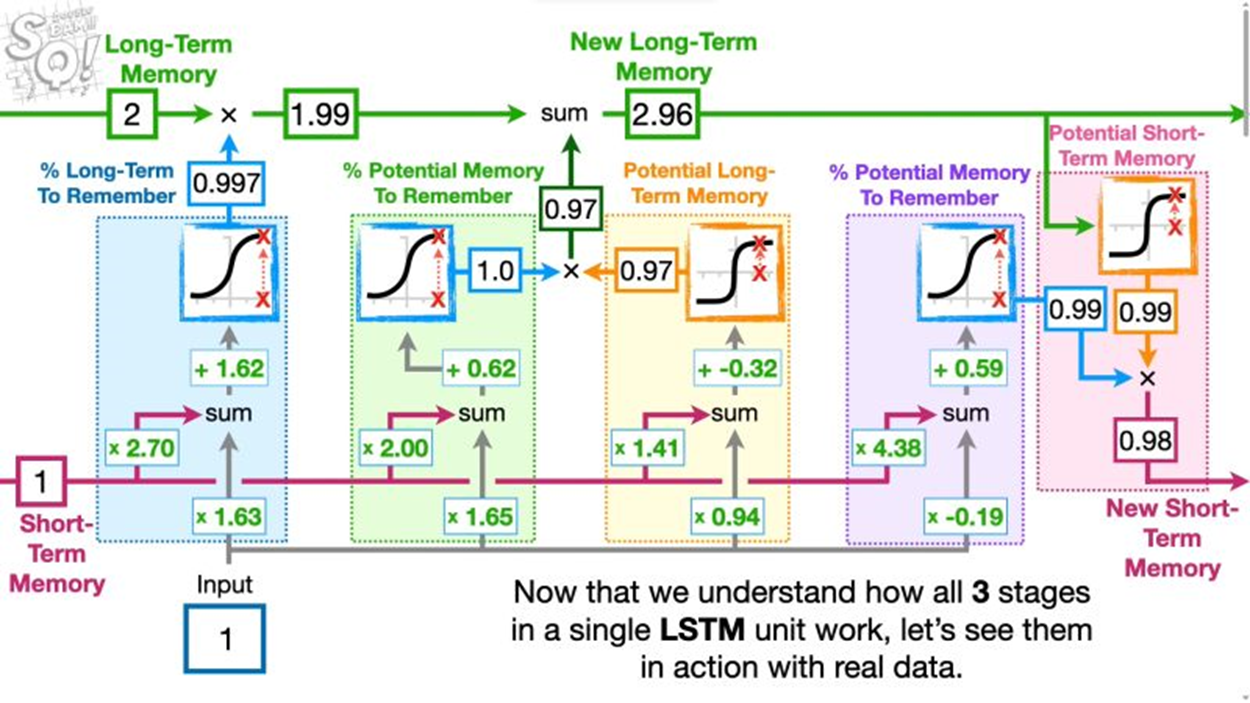|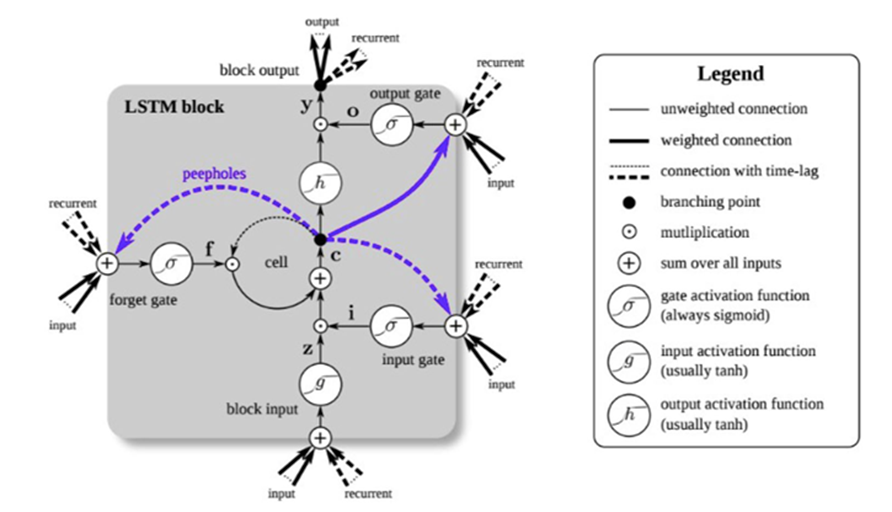

1. Goal of the Model
The primary goal of the model is to predict the stock trend on the 5th day using a 5-day window based on a dataset containing technical and sentiment-related features.
The model follows these constraints:
•	It uses historical stock data and sentiment data to learn patterns.
•	The input must be structured in a way that it can be passed into an LSTM model.
•	The output is a single value that represents the stock movement classification for the 5th day.
•	The aim is to improve on the Random Forest baseline by implementing LSTM-based deep learning.
•	The embedding layer is critical for structuring the input correctly.
________________________________________
2. Nature of the pos Data and Features
The dataset (referred to as pos) consists of stock data and computed sentiment scores. The features include:
•	Numerical features: These represent stock indicators, price movements, and sentiment analysis outputs.
•	Date column (Date): Represents the date of the stock record.
•	Stock identifier (Ticker): Specifies which stock the data belongs to.
•	Target column (Class): This is the label we are predicting, indicating stock movement.
Important properties of the dataset:
•	The number of records per stock per day varies (some stocks may have fewer than 20 rows per day).
•	The goal is to ensure that each stock-date combination has exactly 20 rows, padding if necessary.
•	The dataset needs to be split into train and test by date (not randomly).
•	Feature selection must exclude Date and Class, but all numerical columns must be included.
________________________________________
3. Input Specifications for the Model
To ensure the input meets the LSTM model’s requirements, the following constraints must be applied:
A. Data Processing and Windowing
1.	The dataset must be grouped by Ticker and Date.
2.	Each stock-date pair must have exactly 20 rows (using padding if necessary).
3.	A 5-day window must be created so that:
o	Each input sample consists of 5 consecutive days of data.
o	The model learns from 5 days of historical data to predict the 5th day's target.
4.	The dataset should be structured as:
o	5 days × 20 rows per day × number of features per row (for the LSTM).
o	20 rows per day × number of features per row (for a single LSTM cell input).
B. Embedding Layer Requirements
1.	The embedding layer should process entire daily sequences (20 rows per day) for each stock.
2.	Since some stocks have fewer than 20 rows per day, padding is required.
3.	The embedding layer should be applied before the LSTM layer so that it receives properly structured inputs.
C. Train-Test Split
1.	Data splitting should be by date rather than a percentage of total rows.
2.	Train and test datasets must be ordered correctly (i.e., no shuffled data).
3.	The train set should be based on the first 80% of unique dates, while the test set should be based on the last 20%.
4.	Within each dataset, rows must be grouped by ticker and date.
D. Batch Processing
1.	Shuffling should NOT be used in the DataLoader because:
o	The LSTM model depends on sequential patterns.
o	Data must remain temporally ordered so that time dependencies are preserved.
________________________________________
4. List of All Problems Encountered
Here is a list of the issues identified and fixed so far:
A. Data Processing Issues
1.	Incorrect dropping of Date and Class 
o	Initially, dropping Date removed the ability to track which rows belong to which day within the 5-day window.
o	Fix: Ensure Date is used to group data correctly before dropping it.
2.	Incorrect handling of missing rows 
o	Some stocks had fewer than 20 rows in the original data, but we moved all the rows to a single stock-date pair row where each row contains a feature1…20 with padding applied when necessary.
3.	Incorrect window slicing 
o	The code originally used simple slicing without ensuring 5 full days were included.
o	Fix: Implemented proper 5-day rolling windows, ensuring each input contains exactly 5 days.
B. Model Input Issues
4.	Shape mismatch errors in LSTM 
o	The LSTM was expecting 5 × number of features, but the input wasn’t formatted correctly.
o	Fix: Reshaped data properly before passing it into the model.
5.	Incorrect input to embedding layer 
o	The embedding layer was expecting sequences but was not receiving properly structured sequences.
o	Fix: Made sure that all rows for a given date are fed in correctly.
C. Train-Test Splitting Issues
6.	Incorrect train-test split logic 
o	Initially, the train-test split was done by row count, rather than date-based splitting.
o	Fix: Changed the split to be based on unique dates.
7.	Shuffling in DataLoader 
o	Shuffling was applied, which disrupted the time dependencies.
o	Fix: Disabled shuffling in both trainloader and testloader.
________________________________________
5. Model Evaluation and Parameter Tuning
After training, the model should be evaluated using a confusion matrix and other relevant metrics.
A. Performance Metrics
•	Mean Squared Error (MSE): Measures prediction error but is not ideal for classification.
•	Confusion Matrix: Displays true positives, false positives, false negatives, and true negatives.
•	Precision, Recall, F1-score, and Accuracy: Critical for evaluating classification performance.
B. Confusion Matrix Plot
•	The confusion matrix should be plotted after testing the model.
•	sklearn.metrics.confusion_matrix should be used.
•	seaborn.heatmap can visualize the matrix.
C. Hyperparameter Tuning
Key hyperparameters that may need adjustment:
•	Learning rate (lr=0.001 initially) → Experiment with values like 0.0005, 0.0001
•	Hidden layer size (hidden_size=64 initially) → Try values like 128, 256
•	Batch size (batch_size=32 initially) → Adjust to 16 or 64 to see impact
•	Optimizer (Adam initially) → Consider RMSprop or SGD
•	Number of LSTM layers (1 initially) → Experiment with 2 or 3 layers

**WHY 5 days?:**

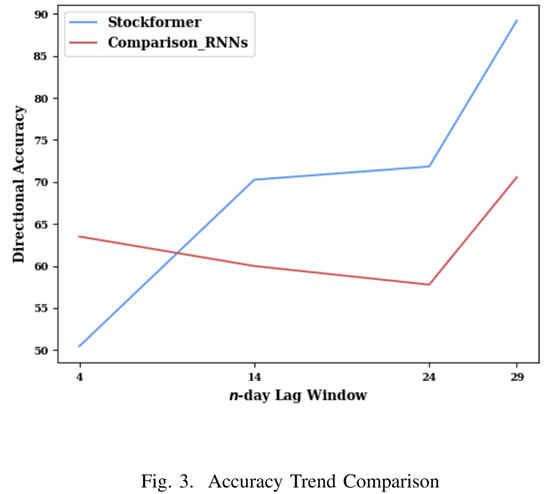

In [ ]:
import pandas as pd
import numpy as np

def pad_and_transform(df: pd.DataFrame) -> pd.DataFrame:
    # Exclude Date, Class, and Ticker from feature selection
    feature_cols = [col for col in df.columns if col not in ["Date", "Class", "Ticker"]]
    
    # Ensure proper data types
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df.sort_values(by=["Date", "Ticker"], inplace=True)
    
    transformed_data = []
    first_print = True  # Flag to print the first transformation
    
    for (date, ticker), group in df.groupby(["Date", "Ticker"], sort=False):
        class_value = group["Class"].iloc[0]  # Get the Class label
        group = group[feature_cols].values  # Convert group to numpy array
        num_rows, num_features = group.shape

        # Ensure group size doesn't exceed 20 (shouldn't happen due to slicing)
        if num_rows > 20:
            print(f"Warning: More than 20 rows found for {ticker} on {date}. Trimming excess.")
            group = group[:20]
        elif num_rows < 20:
            pad_rows = np.tile(group[-1], (20 - num_rows, 1))  # Repeat last row
            group = np.vstack([group, pad_rows])

        # Flatten the array into a single row
        flattened_features = group.flatten()

        # Append to transformed data
        transformed_row = [date, ticker] + flattened_features.tolist() + [class_value]
        transformed_data.append(transformed_row)
        
        # Print the first transformed row for debugging
        if first_print:
            print(f"First transformed row:\n{transformed_row}")
            first_print = False  # Disable further printing
    
    # Create final dataframe
    column_names = ["Date", "Ticker"] + [f"{feat}_{i+1}" for i in range(20) for feat in feature_cols] + ["Class"]
    transformed_df = pd.DataFrame(transformed_data, columns=column_names)
    
    return transformed_df

# Run transformation
LSTM_pos_data = pad_and_transform(final_dataframes['pos'])
LSTM_bigrams_data = pad_and_transform(final_dataframes['bigrams'])


### POS Model

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import os
import shutil
import time
from datetime import datetime

# =============================================================================
# Split data by date
# =============================================================================
unique_dates = LSTM_pos_data['Date'].drop_duplicates().sort_values()
train_cutoff = int(0.8 * len(unique_dates))
train_dates = unique_dates[:train_cutoff].tolist()
test_dates  = unique_dates[train_cutoff:].tolist()

# =============================================================================
# Create datasets
# =============================================================================
class StockDataset(Dataset):
    def __init__(self, df, selected_dates=None, time_window=5):
        if selected_dates is not None:
            df = df[df['Date'].isin(selected_dates)].copy()
        df.sort_values(by=["Ticker", "Date"], inplace=True)
        self.df = df.reset_index(drop=True)
        self.time_window = time_window
        self.feature_cols = [col for col in df.columns if col not in ["Date", "Ticker", "Class"]]
        self.groups = {ticker: group.sort_values(by="Date").reset_index(drop=True) 
                       for ticker, group in self.df.groupby("Ticker")}
        self.sequences = [(ticker, i) for ticker, group in self.groups.items() 
                          if len(group) >= time_window 
                          for i in range(len(group) - time_window + 1)]

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        ticker, start_idx = self.sequences[idx]
        group = self.groups[ticker].iloc[start_idx:start_idx + self.time_window]
        X = group[self.feature_cols].values.astype(np.float32)
        y = group["Class"].iloc[-1]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

train_dataset = StockDataset(LSTM_pos_data, selected_dates=train_dates)
test_dataset  = StockDataset(LSTM_pos_data, selected_dates=test_dates)

# For consistency with POS naming, rename train_loader as pos_train_loader
batch_size = 64
pos_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
pos_test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# =============================================================================
# Define Model
# =============================================================================
class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=512, num_layers=3, dropout=0.2):
        super(ImprovedLSTMModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.lstm = nn.LSTM(256, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc_out = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        lstm_out, _ = self.lstm(x)
        out = self.fc_out(lstm_out[:, -1, :])
        return out.squeeze(1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = len(train_dataset.feature_cols)
pos_model = ImprovedLSTMModel(input_size=input_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(pos_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# TensorBoard Setup
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"runs/lstm_model_h{512}_{timestamp}"
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)
writer = SummaryWriter(log_dir=log_dir)

# =============================================================================
# Train Model
# =============================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, scheduler=None):
    train_losses, val_losses = [], []
    prev_lr = optimizer.param_groups[0]['lr']
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        writer.add_scalars("Loss", {"Train": avg_train_loss, "Validation": avg_val_loss}, epoch)
        if scheduler is not None:
            scheduler.step(avg_val_loss)
            current_lr = optimizer.param_groups[0]['lr']
            if current_lr != prev_lr:
                print(f"LR changed to: {current_lr}")
                prev_lr = current_lr
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    return train_losses, val_losses

num_epochs = 100
train_losses, val_losses = train_model(pos_model, pos_train_loader, pos_test_loader,
                                       criterion, optimizer, num_epochs, scheduler)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# =============================================================================
# Evaluate POS Model
# =============================================================================
def evaluate_model(model, loader):
    model.eval()
    true_labels, pred_values = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            pred_values.extend(outputs.cpu().numpy())
            true_labels.extend(y_batch.cpu().numpy())
    return np.array(true_labels), np.array(pred_values)

# Evaluate model and assign results to new variable names
pos_y_true, pos_y_pred = evaluate_model(pos_model, pos_test_loader)
pos_y_pred_class = (pos_y_pred >= 0).astype(int)
pos_y_true_class = (pos_y_true >= 0).astype(int)

# Compute evaluation metrics using the new variable names
pos_precision, pos_recall, pos_f1, _ = precision_recall_fscore_support(pos_y_true_class, pos_y_pred_class, average='binary')
pos_accuracy = accuracy_score(pos_y_true_class, pos_y_pred_class)

print(f"POS Model - Precision: {pos_precision:.4f}, Recall: {pos_recall:.4f}, F1: {pos_f1:.4f}, Accuracy: {pos_accuracy:.4f}")

# Precision/Recall Bar Plot for POS Model
plt.figure(figsize=(8, 5))
metrics = [pos_precision, pos_recall, pos_f1, pos_accuracy]
labels = ["Precision", "Recall", "F1-Score", "Accuracy"]
sns.barplot(x=labels, y=metrics, palette="viridis")
plt.ylim(0, 1)
plt.title("POS Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()

# Optionally, store evaluation results in a dictionary for later combined visualization
pos_eval_results = {
    'true_labels': pos_y_true,
    'pred_values': pos_y_pred,
    'predicted_classes': pos_y_pred_class,
    'confusion_matrix': confusion_matrix(pos_y_true_class, pos_y_pred_class),
    'precision': pos_precision,
    'recall': pos_recall,
    'f1_score': pos_f1,
    'accuracy': pos_accuracy
}

# Compute and visualize confusion matrix using the new variables
cm_pos = confusion_matrix(pos_y_true_class, pos_y_pred_class)
sns.heatmap(cm_pos, annot=True, fmt='d', cmap='Blues')
plt.title("POS Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================================================================
# Visualize Weight Distributions & Log to TensorBoard for POS Model
# =============================================================================
for name, param in pos_model.named_parameters():
    if "weight" in name:
        writer.add_histogram(name, param.data.cpu().numpy())

writer.add_graph(pos_model, next(iter(pos_train_loader))[0].to(device))
writer.add_scalar("Eval/Precision", pos_precision, num_epochs)
writer.add_scalar("Eval/Recall", pos_recall, num_epochs)
writer.add_scalar("Eval/F1", pos_f1, num_epochs)
writer.add_scalar("Eval/Accuracy", pos_accuracy, num_epochs)
writer.close()

# =============================================================================
# Save POS Model
# =============================================================================
torch.save(pos_model.state_dict(), "pos_best_lstm.pth")
print("💾 POS Model saved!")

### Bigrams Model



![alt text](lstm_bigram_512_20250409-164757-1.png)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import os
import shutil
from datetime import datetime
import time

# =============================================================================
# Cell 1: Split Bigram Data by Date
# =============================================================================
unique_dates = LSTM_bigrams_data['Date'].drop_duplicates().sort_values()
train_cutoff = int(0.8 * len(unique_dates))
train_dates = unique_dates[:train_cutoff].tolist()
test_dates  = unique_dates[train_cutoff:].tolist()

# =============================================================================
# Cell 2: Create Bigram Dataset
# =============================================================================
class BigramStockDataset(Dataset):
    def __init__(self, df, selected_dates=None, time_window=5):
        if selected_dates is not None:
            df = df[df['Date'].isin(selected_dates)].copy()
        df.sort_values(by=["Ticker", "Date"], inplace=True)
        self.df = df.reset_index(drop=True)
        self.time_window = time_window
        # Use all columns except Date, Ticker, and Class as features
        self.feature_cols = [col for col in df.columns if col not in ["Date", "Ticker", "Class"]]
        self.groups = {ticker: group.sort_values(by="Date").reset_index(drop=True)
                       for ticker, group in self.df.groupby("Ticker")}
        self.sequences = [(ticker, i) for ticker, group in self.groups.items() 
                          if len(group) >= time_window 
                          for i in range(len(group) - time_window + 1)]
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        ticker, start_idx = self.sequences[idx]
        group = self.groups[ticker].iloc[start_idx:start_idx + self.time_window]
        X = group[self.feature_cols].values.astype(np.float32)
        y = group["Class"].iloc[-1]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

train_dataset_bigram = BigramStockDataset(LSTM_bigrams_data, selected_dates=train_dates)
test_dataset_bigram  = BigramStockDataset(LSTM_bigrams_data, selected_dates=test_dates)

# =============================================================================
# Cell 3: Create DataLoaders (preserve temporal order)
# =============================================================================
batch_size = 64
train_loader_bigram = DataLoader(train_dataset_bigram, batch_size=batch_size, shuffle=False)
test_loader_bigram  = DataLoader(test_dataset_bigram, batch_size=batch_size, shuffle=False)

# =============================================================================
# Cell 4: Define Bigram LSTM Model
# =============================================================================
# We'll use three dense layers before the LSTM. We set the hidden size to 512 and LSTM layers to 3.
class BigramLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=512, num_layers=3, dropout=0.2):
        super(BigramLSTMModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.lstm = nn.LSTM(256, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc_out = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        lstm_out, _ = self.lstm(x)
        out = self.fc_out(lstm_out[:, -1, :])
        return out.squeeze(1)

# For the Bigram model, input size equals the number of feature columns in the bigram DataFrame.
bigram_input_size = len(train_dataset_bigram.feature_cols)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_bigram = BigramLSTMModel(input_size=bigram_input_size, hidden_size=512, num_layers=3, dropout=0.2).to(device)

print(model_bigram)
print(f"Number of trainable parameters: {sum(p.numel() for p in model_bigram.parameters() if p.requires_grad)}")

# =============================================================================
# Cell 5: Set up Loss, Optimizer, and Scheduler for Bigram Model
# =============================================================================
criterion_bigram = nn.MSELoss()
optimizer_bigram = optim.Adam(model_bigram.parameters(), lr=0.001, weight_decay=1e-5)
scheduler_bigram = optim.lr_scheduler.ReduceLROnPlateau(optimizer_bigram, mode='min', factor=0.5, patience=3)

# TensorBoard Setup for Bigram model
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_bigram = f"runs/lstm_bigram_{512}_{timestamp}"
if os.path.exists(log_dir_bigram):
    shutil.rmtree(log_dir_bigram)
writer_bigram = SummaryWriter(log_dir=log_dir_bigram)

# =============================================================================
# Cell 6: Train Bigram Model
# =============================================================================
def train_model_bigram(model, train_loader, val_loader, criterion, optimizer, epochs, scheduler=None):
    train_losses, val_losses = [], []
    prev_lr = optimizer.param_groups[0]['lr']
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        writer_bigram.add_scalars("Loss", {"Train": avg_train_loss, "Validation": avg_val_loss}, epoch)
        
        if scheduler is not None:
            scheduler.step(avg_val_loss)
            current_lr = optimizer_bigram.param_groups[0]['lr']
            if current_lr != prev_lr:
                print(f"LR changed to: {current_lr}")
                prev_lr = current_lr
        
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    return train_losses, val_losses

num_epochs_bigram = 100
train_losses_bigram, val_losses_bigram = train_model_bigram(model_bigram, train_loader_bigram, test_loader_bigram,
                                                             criterion_bigram, optimizer_bigram, num_epochs_bigram,
                                                             scheduler_bigram)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs_bigram+1), train_losses_bigram, label='Train')
plt.plot(range(1, num_epochs_bigram+1), val_losses_bigram, label='Validation')
plt.title("Bigram Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# =============================================================================
# Cell 7: Evaluate Bigram Model (Updated Variable Names)
# =============================================================================
def evaluate_model_bigram(model, loader):
    model.eval()
    true_labels, pred_values = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            pred_values.extend(outputs.cpu().numpy())
            true_labels.extend(y_batch.cpu().numpy())
    return np.array(true_labels), np.array(pred_values)

# Evaluate using model_bigram and test_loader_bigram
bigram_y_true, bigram_y_pred = evaluate_model_bigram(model_bigram, test_loader_bigram)

# Compute binary predictions (assumed threshold 0)
bigram_y_pred_class = (bigram_y_pred >= 0).astype(int)
# Also compute binary ground truth if necessary
bigram_y_true_class = (bigram_y_true >= 0).astype(int)

# Compute evaluation metrics for the Bigram Model
bigram_precision, bigram_recall, bigram_f1, _ = precision_recall_fscore_support(
    bigram_y_true_class, bigram_y_pred_class, average='binary')
bigram_accuracy = accuracy_score(bigram_y_true_class, bigram_y_pred_class)

print(f"Bigram - Precision: {bigram_precision:.4f}, Recall: {bigram_recall:.4f}, " +
      f"F1: {bigram_f1:.4f}, Accuracy: {bigram_accuracy:.4f}")

# Precision/Recall Bar Plot for Bigram Model
plt.figure(figsize=(8, 5))
metrics_bigram = [bigram_precision, bigram_recall, bigram_f1, bigram_accuracy]
labels_bigram = ["Precision", "Recall", "F1-Score", "Accuracy"]
sns.barplot(x=labels_bigram, y=metrics_bigram, palette="viridis")
plt.ylim(0, 1)
plt.title("Bigram Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()

# Compute and visualize confusion matrix using the updated variables
bigram_cm = confusion_matrix(bigram_y_true_class, bigram_y_pred_class)
sns.heatmap(bigram_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Bigram Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save evaluation results into a dictionary for further use (optional)
bigram_eval_results = {
    'bigram_y_true': bigram_y_true,
    'bigram_y_pred': bigram_y_pred,
    'bigram_y_pred_class': bigram_y_pred_class,
    'confusion_matrix': bigram_cm,
    'bigram_precision': bigram_precision,
    'bigram_recall': bigram_recall,
    'bigram_f1': bigram_f1,
    'bigram_accuracy': bigram_accuracy
}

# =============================================================================
# Visualize Weight Distributions & Log to TensorBoard for Bigram Model
# =============================================================================
for name, param in model_bigram.named_parameters():
    if "weight" in name:
        writer_bigram.add_histogram(name, param.data.cpu().numpy())

writer_bigram.add_graph(model_bigram, next(iter(train_loader_bigram))[0].to(device))
writer_bigram.add_scalar("Eval/Precision", bigram_precision, num_epochs_bigram)
writer_bigram.add_scalar("Eval/Recall", bigram_recall, num_epochs_bigram)
writer_bigram.add_scalar("Eval/F1", bigram_f1, num_epochs_bigram)
writer_bigram.add_scalar("Eval/Accuracy", bigram_accuracy, num_epochs_bigram)
writer_bigram.close()

# =============================================================================
# Save Bigram Model
# =============================================================================
torch.save(model_bigram.state_dict(), "bigram_best_lstm.pth")
print("💾 Bigram Model saved!")


## Word Embedding Model
Padding:
– We pad (or truncate) each day’s data so that every (Ticker, Date) day becomes a matrix of exactly 20 rows × num_features.
– This flattened matrix (of length 20 × num_features) is then fed into the “DailyEncoder” which converts it into a day‐embedding vector (of size day_emb_size, set here to 128).

Sliding Window Sequences:
– We form sequences of 5 consecutive days for each ticker using a sliding window.
– This sliding window naturally ensures that (except at the very beginning and very end) each day appears in 5 different sequences—in different positions (first, second, …, fifth).
– In other words, if a stock has T days in the data, you’ll create T‑time_window sequences, which maximizes the usage of each day’s information.

![alt text](we_transformed_4branch_lstm_20250410-213936-1.png)

In [ ]:
import pandas as pd
import numpy as np

def pad_and_transform_with_embeddings(df: pd.DataFrame, time_steps: int = 20) -> pd.DataFrame:
    # Define embedding and non-embedding feature columns
    embedding_cols = ['article_embeddings', 'title_embeddings',
                      'mean_general_article_embeddings', 'mean_general_title_embeddings']
    non_embedding_cols = [col for col in df.columns if col not in embedding_cols + ['Date', 'Ticker', 'Class']]
    
    # Ensure proper data types and sorting
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by=['Date', 'Ticker'], inplace=True)
    
    transformed_data = []
    
    for (date, ticker), group in df.groupby(['Date', 'Ticker'], sort=False):
        class_value = group['Class'].iloc[0]  # Get the Class label
        
        # Extract non-embedding features and pad if necessary
        non_embedding_data = group[non_embedding_cols].values
        num_rows = non_embedding_data.shape[0]
        
        if num_rows > time_steps:
            non_embedding_data = non_embedding_data[:time_steps]
        elif num_rows < time_steps:
            pad_rows = np.tile(non_embedding_data[-1], (time_steps - num_rows, 1))
            non_embedding_data = np.vstack([non_embedding_data, pad_rows])
        
        # Extract embedding features and pad if necessary
        embedding_data = {col: group[col].tolist() for col in embedding_cols}
        for col in embedding_cols:
            if num_rows > time_steps:
                embedding_data[col] = embedding_data[col][:time_steps]
            elif num_rows < time_steps:
                pad_embedding = np.zeros_like(embedding_data[col][-1])
                embedding_data[col].extend([pad_embedding] * (time_steps - num_rows))
        
        # Combine all features
        combined_features = []
        for i in range(time_steps):
            combined_features.extend(non_embedding_data[i])
            for col in embedding_cols:
                combined_features.append(embedding_data[col][i])
        
        transformed_row = [date, ticker] + combined_features + [class_value]
        transformed_data.append(transformed_row)
    
    # Create column names
    column_names = ['Date', 'Ticker']
    for i in range(1, time_steps + 1):
        for col in non_embedding_cols:
            column_names.append(f'{col}_{i}')
        for col in embedding_cols:
            column_names.append(f'{col}_{i}')
    column_names.append('Class')
    
    # Create final DataFrame
    transformed_df = pd.DataFrame(transformed_data, columns=column_names)
    
    return transformed_df

# Example usage:
LSTM_word_embeddings_transformed = pad_and_transform_with_embeddings(f_word_embeddings_news)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import os, shutil
from datetime import datetime
import time
from math import sqrt

#############################################
# Parameters
#############################################
TIME_WINDOW = 5      # Length of sliding window in days
PADDED_ROWS = 20     # Number of rows per stock-date pair (after transformation)
EMBEDDING_SIZE = 768 # Embedding vector dimension

#############################################
# Cell 1: Split Transformed WE Data by Date
#############################################
# Assume LSTM_word_embeddings_transformed is your already transformed DataFrame
unique_dates = LSTM_word_embeddings_transformed['Date'].drop_duplicates().sort_values()
train_cutoff = int(0.8 * len(unique_dates))
train_dates = unique_dates[:train_cutoff].tolist()
test_dates  = unique_dates[train_cutoff:].tolist()

#############################################
# Cell 2: Create WE Transformed Dataset (WETfDataset)
#############################################
class WETfDataset(Dataset):
    """
    This dataset uses the transformed WE DataFrame.
    Each row in the DataFrame corresponds to one stock–date pair with flattened features.
    The expected column order is:
      Date, Ticker, then for each day from 1 to PADDED_ROWS:
          [Numeric columns] followed by
          [article_embeddings columns],
          [title_embeddings columns],
          [mean_general_article_embeddings columns],
          [mean_general_title_embeddings columns],
      and then Class.
      
    A sliding window (of TIME_WINDOW days) is built per ticker.
    """
    def __init__(self, df, selected_dates=None, time_window=TIME_WINDOW):
        if selected_dates is not None:
            df = df[df['Date'].isin(selected_dates)].copy()
        df.sort_values(by=["Ticker", "Date"], inplace=True)
        self.df = df.reset_index(drop=True)
        self.time_window = time_window
        
        # All columns except Date, Ticker, Class.
        all_features = [col for col in df.columns if col not in ["Date", "Ticker", "Class"]]
        # Numeric columns: those without "embeddings" in the name.
        self.numeric_cols = [col for col in all_features if "embeddings" not in col]
        # Embedding columns for the four groups:
        self.article_emb_cols = [col for col in all_features if col.startswith("article_embeddings")]
        self.title_emb_cols   = [col for col in all_features if col.startswith("title_embeddings") and "mean_general" not in col]
        self.mean_gen_article_emb_cols = [col for col in all_features if col.startswith("mean_general_article_embeddings")]
        self.mean_gen_title_emb_cols   = [col for col in all_features if col.startswith("mean_general_title_embeddings")]
        
        # Define overall column order.
        self.feature_order = (self.numeric_cols + self.article_emb_cols +
                              self.title_emb_cols + self.mean_gen_article_emb_cols +
                              self.mean_gen_title_emb_cols)
        
        # Group by ticker to build sliding windows.
        self.groups = {ticker: group.sort_values(by="Date").reset_index(drop=True)
                       for ticker, group in self.df.groupby("Ticker")}
        self.sequences = []
        for ticker, group in self.groups.items():
            if len(group) >= time_window:
                for i in range(len(group) - time_window + 1):
                    self.sequences.append((ticker, i))
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        ticker, start_idx = self.sequences[idx]
        group = self.groups[ticker].iloc[start_idx: start_idx + self.time_window]
        day_vectors = []
        for _, row in group.iterrows():
            vec = []
            for col in self.numeric_cols:
                vec.append(float(row[col]))
            for col in self.article_emb_cols:
                vec.append(row[col])
            for col in self.title_emb_cols:
                vec.append(row[col])
            for col in self.mean_gen_article_emb_cols:
                vec.append(row[col])
            for col in self.mean_gen_title_emb_cols:
                vec.append(row[col])
            day_vectors.append(vec)
        processed_days = []
        for day in day_vectors:
            numeric_part = np.array(day[:len(self.numeric_cols)], dtype=np.float32)
            start = len(self.numeric_cols)
            art_embs = day[start : start + len(self.article_emb_cols)]
            start += len(self.article_emb_cols)
            title_embs = day[start : start + len(self.title_emb_cols)]
            start += len(self.title_emb_cols)
            mean_art_embs = day[start : start + len(self.mean_gen_article_emb_cols)]
            start += len(self.mean_gen_article_emb_cols)
            mean_title_embs = day[start : ]
            
            art_flat = np.concatenate([np.array(x, dtype=np.float32).flatten() for x in art_embs]) if art_embs else np.array([], dtype=np.float32)
            title_flat = np.concatenate([np.array(x, dtype=np.float32).flatten() for x in title_embs]) if title_embs else np.array([], dtype=np.float32)
            mean_art_flat = np.concatenate([np.array(x, dtype=np.float32).flatten() for x in mean_art_embs]) if mean_art_embs else np.array([], dtype=np.float32)
            mean_title_flat = np.concatenate([np.array(x, dtype=np.float32).flatten() for x in mean_title_embs]) if mean_title_embs else np.array([], dtype=np.float32)
            
            day_vector = np.concatenate([numeric_part, art_flat, title_flat, mean_art_flat, mean_title_flat])
            processed_days.append(day_vector)
        X = np.stack(processed_days)
        y = group["Class"].iloc[-1]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Create dataset and dataloaders.
train_dataset_we = WETfDataset(LSTM_word_embeddings_transformed, selected_dates=train_dates, time_window=TIME_WINDOW)
test_dataset_we = WETfDataset(LSTM_word_embeddings_transformed, selected_dates=test_dates, time_window=TIME_WINDOW)
batch_size = 64
train_loader_we = DataLoader(train_dataset_we, batch_size=batch_size, shuffle=False)
test_loader_we = DataLoader(test_dataset_we, batch_size=batch_size, shuffle=False)

#############################################
# Cell 3b: Compute Dimensions for Model Input
#############################################
num_numeric = len(train_dataset_we.numeric_cols)
num_article = len(train_dataset_we.article_emb_cols)
num_title = len(train_dataset_we.title_emb_cols)
num_mean_art = len(train_dataset_we.mean_gen_article_emb_cols)
num_mean_title = len(train_dataset_we.mean_gen_title_emb_cols)

article_total_dim = num_article * EMBEDDING_SIZE
title_total_dim = num_title * EMBEDDING_SIZE
mean_art_total_dim = num_mean_art * EMBEDDING_SIZE
mean_title_total_dim = num_mean_title * EMBEDDING_SIZE

print(f"Numeric dim: {num_numeric}, Article total dim: {article_total_dim}, Title total dim: {title_total_dim}, Mean-Gen Article total dim: {mean_art_total_dim}, Mean-Gen Title total dim: {mean_title_total_dim}")

#############################################
# Cell 4: Define WE Transformed LSTM Model with 4 Branches for Embeddings
#############################################
class WE_Transformed_LSTM_4branch(nn.Module):
    def __init__(self, num_numeric, article_emb_dim, title_emb_dim, mean_art_emb_dim, mean_title_emb_dim, hidden_size=128, num_layers=3):
        """
        The LSTM will process per-day inputs that consist of:
          - A numeric part (length = num_numeric),
          - Plus 4 scalar outputs from 4 feedforward branches, each processing a different embedding category.
        """
        super(WE_Transformed_LSTM_4branch, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Feedforward network for article embeddings.
        self.article_net = nn.Sequential(
            nn.Linear(EMBEDDING_SIZE, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        # Feedforward network for title embeddings.
        self.title_net = nn.Sequential(
            nn.Linear(EMBEDDING_SIZE, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        # Feedforward for mean general article embeddings.
        self.mean_art_net = nn.Sequential(
            nn.Linear(EMBEDDING_SIZE, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        # Feedforward for mean general title embeddings.
        self.mean_title_net = nn.Sequential(
            nn.Linear(EMBEDDING_SIZE, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
        lstm_input_dim = num_numeric + 4  # 4 scalar outputs added to numeric features.
        self.lstm = nn.LSTM(lstm_input_dim, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc_out = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        # x shape: [batch, time_window, day_feature_dim]
        # Split into sections according to known dimensions.
        numeric_part = x[:, :, :num_numeric]  # [batch, t, num_numeric]
        idx = num_numeric
        article_flat = x[:, :, idx: idx + article_total_dim]  # [batch, t, article_total_dim]
        idx += article_total_dim
        title_flat = x[:, :, idx: idx + title_total_dim]      # [batch, t, title_total_dim]
        idx += title_total_dim
        mean_art_flat = x[:, :, idx: idx + mean_art_total_dim]  # [batch, t, mean_art_total_dim]
        idx += mean_art_total_dim
        mean_title_flat = x[:, :, idx: idx + mean_title_total_dim]  # [batch, t, mean_title_total_dim]
        
        batch_size, t, _ = article_flat.shape
        
        # Reshape to [batch, time_window, PADDED_ROWS, EMBEDDING_SIZE] using .reshape(...).
        article_emb = article_flat.reshape(batch_size, t, PADDED_ROWS, EMBEDDING_SIZE)
        title_emb = title_flat.reshape(batch_size, t, PADDED_ROWS, EMBEDDING_SIZE)
        mean_art_emb = mean_art_flat.reshape(batch_size, t, PADDED_ROWS, EMBEDDING_SIZE)
        mean_title_emb = mean_title_flat.reshape(batch_size, t, PADDED_ROWS, EMBEDDING_SIZE)
        
        # Process each embedding category: merge batch, time, and PADDED_ROWS dimensions, then apply the branch.
        article_out = self.article_net(article_emb.reshape(-1, EMBEDDING_SIZE))  # shape: [batch*t*PADDED_ROWS, 1]
        article_out = article_out.reshape(batch_size, t, PADDED_ROWS, 1).mean(dim=2)  # [batch, t, 1]
        
        title_out = self.title_net(title_emb.reshape(-1, EMBEDDING_SIZE))
        title_out = title_out.reshape(batch_size, t, PADDED_ROWS, 1).mean(dim=2)
        
        mean_art_out = self.mean_art_net(mean_art_emb.reshape(-1, EMBEDDING_SIZE))
        mean_art_out = mean_art_out.reshape(batch_size, t, PADDED_ROWS, 1).mean(dim=2)
        
        mean_title_out = self.mean_title_net(mean_title_emb.reshape(-1, EMBEDDING_SIZE))
        mean_title_out = mean_title_out.reshape(batch_size, t, PADDED_ROWS, 1).mean(dim=2)
        
        # Concatenate numeric features with the four scalar outputs.
        augmented_input = torch.cat((numeric_part, article_out, title_out, mean_art_out, mean_title_out), dim=2)
        # augmented_input shape: [batch, time_window, num_numeric+4]
        
        # Process through LSTM.
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        lstm_out, _ = self.lstm(augmented_input, (h0, c0))
        out = self.fc_out(lstm_out[:, -1, :])
        return out.squeeze(1)

#############################################
# Cell 4b: Instantiate WE Transformed 4-Branch LSTM Model
#############################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
we_model = WE_Transformed_LSTM_4branch(num_numeric=num_numeric,
                                       article_emb_dim=article_total_dim,
                                       title_emb_dim=title_total_dim,
                                       mean_art_emb_dim=mean_art_total_dim,
                                       mean_title_emb_dim=mean_title_total_dim,
                                       hidden_size=128,
                                       num_layers=3).to(device)

print(we_model)
total_params = sum(p.numel() for p in we_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")

#############################################
# Cell 5: Set up Loss, Optimizer, Scheduler, and TensorBoard for WE Model
#############################################
criterion = nn.MSELoss()  # Regression loss
optimizer = optim.Adam(we_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"runs/we_transformed_4branch_lstm_{timestamp}"
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)
writer = SummaryWriter(log_dir=log_dir)

#############################################
# Cell 6: Train WE Transformed 4-Branch LSTM Model
#############################################
def train_model_we(model, train_loader, val_loader, criterion, optimizer, epochs, scheduler=None):
    train_losses, val_losses = [], []
    prev_lr = optimizer.param_groups[0]['lr']
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        writer.add_scalars("Loss", {"Train": avg_train_loss, "Validation": avg_val_loss}, epoch)
        
        if scheduler is not None:
            scheduler.step(avg_val_loss)
            current_lr = optimizer.param_groups[0]['lr']
            if current_lr != prev_lr:
                print(f"LR changed to: {current_lr}")
                prev_lr = current_lr
        
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    return train_losses, val_losses

num_epochs = 100
train_losses, val_losses = train_model_we(we_model, train_loader_we, test_loader_we,
                                          criterion, optimizer, num_epochs, scheduler)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation')
plt.title("WE Transformed 4-Branch Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

#############################################
# Cell 7: Evaluate WE Transformed 4-Branch Model (Modified Evaluation Section)
#############################################
def evaluate_model_we(model, loader):
    model.eval()
    true_labels, pred_values = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            pred_values.extend(outputs.cpu().numpy())
            true_labels.extend(y_batch.cpu().numpy())
    return np.array(true_labels), np.array(pred_values)

we_true, we_pred = evaluate_model_we(we_model, test_loader_we)
we_pred_class = (we_pred >= 0).astype(int)
we_true_class = (we_true >= 0).astype(int)

# Compute confusion matrix and visualize it
we_cm = confusion_matrix(we_true_class, we_pred_class)
sns.heatmap(we_cm, annot=True, fmt='d', cmap='Blues')
plt.title("WE Transformed 4-Branch Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute evaluation metrics for the WE model
we_precision, we_recall, we_f1, _ = precision_recall_fscore_support(we_true_class, we_pred_class, average='binary')
we_accuracy = accuracy_score(we_true_class, we_pred_class)
print(f"WE Model - Precision: {we_precision:.4f}, Recall: {we_recall:.4f}, F1: {we_f1:.4f}, Accuracy: {we_accuracy:.4f}")

# Precision/Recall Bar Plot for WE Transformed model (without hue)
plt.figure(figsize=(8, 5))
we_metrics = [we_precision, we_recall, we_f1, we_accuracy]
we_labels = ["Precision", "Recall", "F1-Score", "Accuracy"]
sns.barplot(x=we_labels, y=we_metrics, palette="viridis")
plt.ylim(0, 1)
plt.title("WE Transformed 4-Branch Evaluation Metrics")
plt.ylabel("Score")
plt.show()

# Save evaluation results into a dictionary 
we_eval_results = {
    'true_labels': we_true,
    'pred_values': we_pred,
    'predicted_classes': we_pred_class,
    'confusion_matrix': we_cm,
    'precision': we_precision,
    'recall': we_recall,
    'f1_score': we_f1,
    'accuracy': we_accuracy
}

#############################################
# Cell 8: Visualize WE Model Weight Distributions & Log to TensorBoard
#############################################
for name, param in we_model.named_parameters():
    if "weight" in name:
        writer.add_histogram(name, param.data.cpu().numpy())
writer.add_graph(we_model, next(iter(train_loader_we))[0].to(device))
writer.add_scalar("Eval/Precision", we_precision, num_epochs)
writer.add_scalar("Eval/Recall", we_recall, num_epochs)
writer.add_scalar("Eval/F1", we_f1, num_epochs)
writer.add_scalar("Eval/Accuracy", we_accuracy, num_epochs)
writer.close()

#############################################
# Cell 9: Save WE Transformed 4-Branch Model
#############################################
torch.save(we_model.state_dict(), "stock_we_transformed_4branch_lstm_model.pth")
print("💾 WE Transformed 4-Branch LSTM Model saved!")

## Comparation of Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import math
# ------------------------------------------------------------------------------
# Metrics Bar Chart
# ------------------------------------------------------------------------------
model_names = ['WE Transformed', 'Bigram', 'POS Model']
metrics_dict = {
    'Precision': [we_precision, bigram_precision, pos_precision],
    'Recall':    [we_recall,    bigram_recall,    pos_recall],
    'F1-Score':  [we_f1,        bigram_f1,        pos_f1],
    'Accuracy':  [we_accuracy,  bigram_accuracy,  pos_accuracy]
}

x = np.arange(len(model_names))
width = 0.2
colors = sns.color_palette("Set2", n_colors=len(metrics_dict))

fig, ax = plt.subplots(figsize=(12, 7))
for i, (metric, values) in enumerate(metrics_dict.items()):
    bars = ax.bar(x + i*width, values, width, label=metric, color=colors[i])
    for bar in bars:
        ax.annotate(f'{bar.get_height():.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metric Comparison Across Models')
ax.set_xticks(x + width*(len(metrics_dict)-1)/2)
ax.set_xticklabels(model_names)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(0,1.05)
ax.legend(title="Metrics")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# Confusion Matrices
# ------------------------------------------------------------------------------
def plot_confusion(ax, true_labels, pred_labels, title):
    cm = confusion_matrix(true_labels, pred_labels, labels=[0,1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=[0,1], yticklabels=[0,1], cbar=False)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plot_confusion(axs[0], we_true_class,       we_pred_class,      "WE Transformed")
plot_confusion(axs[1], bigram_y_true_class, bigram_y_pred_class,"Bigram")
plot_confusion(axs[2], pos_y_true_class,    pos_y_pred_class,   "POS Model")
plt.tight_layout()
plt.show()

### Confusion Matrix and Metrics Analysis

The image above presents three confusion matrices side by side, each corresponding to one of the models developed in this study: the **Word Embedding (WE) Transformed model**, the **Bigram model**, and the **POS model**. These matrices are visualized to highlight the classification performance in terms of how accurately each model predicts the stock trend for day 5 based on 5-day time windows.

Below the matrices, we provide a detailed breakdown of their corresponding performance metrics, including Precision, Recall, F1-Score, and Accuracy.

#### 1. Confusion Matrix Summary

The confusion matrices summarize the classification outcomes as follows:

| Model           | True Negatives (TN) | False Positives (FP) | False Negatives (FN) | True Positives (TP) |
|----------------|---------------------|----------------------|----------------------|---------------------|
| WE Transformed | 596                 | 6                    | 135                  | 176                 |
| Bigram         | 597                 | 5                    | 193                  | 118                 |
| POS Model      | 600                 | 2                    | 118                  | 193                 |

- The **POS model** achieves the most balanced results with the **lowest false positives (2)** and **lowest false negatives (118)**, leading to higher overall correctness.
- The **WE Transformed model** performs reasonably well but suffers from more false negatives (135), reducing its recall.
- The **Bigram model**, while maintaining low false positives (5), fails to correctly identify a large number of actual positives (193 false negatives), substantially hurting its recall and F1-Score.

#### 2. Performance Metrics

| Metric      | WE Transformed | Bigram | POS Model |
|-------------|----------------|--------|-----------|
| Precision   | 0.9670         | 0.9593 | **0.9897** |
| Recall      | 0.5659         | 0.3794 | **0.6206** |
| F1-Score    | 0.7140         | 0.5438 | **0.7628** |
| Accuracy    | 0.8456         | 0.7831 | **0.8686** |

These metrics reinforce the conclusions derived from the confusion matrices:

- **Precision** is high for all models, indicating they rarely predict a positive class incorrectly. However, the **POS model leads** with an outstanding 0.9897.
- **Recall**, which measures the ability to detect actual positive instances, varies more significantly: the POS model again leads with 0.6206, followed by WE at 0.5659. Bigram falls short at 0.3794.
- The **F1-Score**, which balances precision and recall, further highlights the POS model’s strength with 0.7628.
- **Accuracy**, while generally high across the board, also favors the POS model at 0.8686.

#### 3. Observations

- The **POS model consistently outperforms** the other models in every major metric. Its ability to balance true positives and minimize both false positives and false negatives makes it the most reliable for this classification task.
- The **Bigram model’s low recall and F1-Score** suggest it is overly conservative, often failing to recognize when the market is predicted to rise, possibly due to the loss of contextual information in sparse bigram representations.
- The **WE model performs moderately well**, benefiting from richer semantic embeddings, but still falls short in comparison to the structurally aware POS model.

#### 4. Conclusion

In conclusion, the POS-based model demonstrates the best overall performance in predicting stock trends using LSTM. Its precision-recall balance and robust classification behavior across both positive and negative classes suggest that incorporating syntactic linguistic features contributes significantly to model effectiveness. By contrast, bigram-based inputs appear too limited in scope, and while word embeddings offer semantic richness, they do not compensate for the structural advantages offered by POS tagging in this task.

In [ ]:
# ------------------------------------------------------------------------------
# Score Distributions by True Class 
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
for ax, name, y_score, y_true in zip(
        axes,
        model_names,
        [we_pred, bigram_y_pred, pos_y_pred],
        [we_true_class, bigram_y_true_class, pos_y_true_class]
    ):
    df = pd.DataFrame({'score': y_score, 'true': y_true})
    sns.kdeplot(
        data=df, x='score', hue='true', fill=True, common_norm=False,
        palette=['C0','C1'], alpha=0.5, ax=ax
    )
    ax.set_title(f"{name}\nScore Distribution by True Class")
    ax.set_xlabel("Predicted Score")
    ax.set_ylabel("Density")
    ax.legend(title='True', labels=['0','1'])
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# Prediction Error Distributions
# ------------------------------------------------------------------------------
errors = [
    we_pred - we_true,
    bigram_y_pred - bigram_y_true,
    pos_y_pred - pos_y_true
]
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
for ax, name, err in zip(axes, model_names, errors):
    sns.histplot(err, kde=True, stat='density', alpha=0.6, ax=ax)
    ax.set_title(f"{name}\nPrediction Error Distribution")
    ax.set_xlabel("Error = Predicted − True")
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

Here is the requested Markdown analysis of the image with index and curve interpretations, in a continuous and formal style, following the structure of your summary:

---

### Evaluation of Score and Error Distributions Across LSTM Models

The visual comparison consists of six subplots arranged in a 3x2 grid, with the top row illustrating **score distributions by true class** and the bottom row showing **prediction error distributions**. Each column corresponds to one of three LSTM models differentiated by their input preprocessing methods: **WE Transformed**, **Bigram**, and **POS Model**.

#### 1. **Score Distribution by True Class**

- **WE Transformed (Top Left)**:  
  The KDE plots display two distinct curves for classes 0 (orange) and 1 (blue). The class 1 scores are centered around approximately -0.1, while class 0 peaks tightly around 0.05. The separation between the distributions indicates the model's confidence, though some overlap remains in the -0.05 to 0.0 range. This distinction supports the model's relatively high precision (0.9670) and a moderate recall (0.5659).

- **Bigram (Top Center)**:  
  This plot shows a reduced separation between the two classes. The blue (class 1) scores again center around -0.1, but the orange (class 0) scores peak near zero with a broader base. The overlapping region is more prominent compared to the WE model, implying increased misclassifications and supporting the lower recall (0.3794) and F1-score (0.5438).

- **POS Model (Top Right)**:  
  A clear demarcation is evident between the two classes. Class 1 scores (blue) are tightly clustered around -0.1 to -0.05, while class 0 (orange) peaks just above zero. This minimal overlap results in higher class separability, aligning with the POS model’s leading performance in both recall (0.6206) and F1-score (0.7628).

#### 2. **Prediction Error Distribution**

- **WE Transformed (Bottom Left)**:  
  The histogram and density curve show a slightly right-skewed distribution, centered around a mean error close to zero. The density peak near 0.01 reflects a minor positive bias in predictions. Despite this, the distribution is relatively symmetric, supporting a balanced prediction behavior and corroborating the model’s strong precision and fair recall.

- **Bigram (Bottom Center)**:  
  The error distribution is noticeably more skewed, with a sharper peak slightly below zero and a long right tail. This skew suggests the model systematically under-predicts positive movements. The asymmetry aligns with the low recall value, indicating missed trend signals and potential over-conservatism in predictions.

- **POS Model (Bottom Right)**:  
  The POS model exhibits the most symmetric and narrow distribution around zero, indicating highly centered and consistent prediction errors. This tight spread reflects lower variance in model predictions and supports its superior accuracy (0.8686) and overall robustness.

---

### Integrated Performance Summary

The comparative distributional analysis confirms the results observed in traditional evaluation metrics:

- The **POS Model** achieves the best trade-off between **precision** and **recall**, as seen through its highly separated class score distributions and tightly centered error profile.
- The **WE Transformed model** also performs well, especially in precision, but with slightly less recall and a broader error spread.
- The **Bigram model**, although structurally similar to the POS model, underperforms due to wider overlap between score distributions and skewed error tendencies.

---

### Final Remarks

These visual diagnostics reinforce the conclusion that **contextual preprocessing**, such as **POS tagging**, offers tangible performance gains in sentiment-informed financial forecasting tasks. The POS model’s structured linguistic encoding improves class separability and minimizes prediction errors. Therefore, for applications involving sequential financial sentiment data, the POS-based LSTM model emerges as the most reliable choice, especially when precision and recall must be balanced under uncertainty.



In [ ]:
# ------------------------------------------------------------------------------
# Predicted vs. True Scatter
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
for ax, name, y_true, y_pred in zip(
        axes, model_names,
        [we_true, bigram_y_true, pos_y_true],
        [we_pred, bigram_y_pred, pos_y_pred]
    ):
    ax.scatter(y_true, y_pred, alpha=0.6, s=20)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    ax.plot([mn, mx], [mn, mx], 'k--', lw=1)
    ax.set_title(f"{name}\nPredicted vs. True")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
plt.tight_layout()
plt.show()

Here is the Markdown analysis for the second image, which presents **Predicted vs. True** value scatter plots across the three LSTM models. This visual perspective complements the previous distributional analysis and strengthens the model comparison:

---

### Predicted vs. True Scatter Plot Analysis

The plots illustrate the relationship between **true values (x-axis)** and **model predictions (y-axis)** for three LSTM models: **WE Transformed**, **Bigram**, and **POS Model**. A 45-degree diagonal reference line is plotted in each panel to indicate perfect prediction alignment (where predicted = true).

#### 1. **WE Transformed (Left Panel)**

- The majority of points closely follow the diagonal, showing a strong correlation between true and predicted values.
- While there is some mild dispersion, particularly at the extremes of the range, the cluster around the central values (e.g., -0.2 to 0.0) is dense and consistent.
- This tight adherence explains the model's solid **accuracy (0.8456)** and respectable **F1-score (0.7140)**.
- A few outliers below the -0.3 mark suggest the model underestimates some negative cases, although the magnitude of these deviations is limited.

#### 2. **Bigram (Middle Panel)**

- Predictions are more scattered compared to the WE model, especially in the tails.
- A noticeable number of data points deviate from the diagonal line, indicating **higher prediction variance**.
- The core data cluster is still centered but looser than in the other models, suggesting reduced predictive precision.
- These characteristics are in line with its **lower recall (0.3794)** and **F1-score (0.5438)**, confirming its weaker alignment between actual and predicted values.

#### 3. **POS Model (Right Panel)**

- This plot shows the **tightest clustering** along the diagonal, denoting high consistency in predictions.
- Most points are concentrated tightly near the line even at the range extremes, reflecting minimal prediction bias and high reliability.
- This visual is fully consistent with the POS model's **leading performance across all metrics**, including the highest **accuracy (0.8686)** and **F1-score (0.7628)**.
- The model's robustness is clearly reflected in this visual confirmation of low residual error and stable generalization.

---

### Comparative Insights

- **Alignment to Diagonal**: The closer the points are to the diagonal line, the more accurate the predictions. The POS model exhibits the best fit, followed by the WE model, with the Bigram model trailing.
- **Prediction Spread**: The POS model's plot shows the least dispersion, indicating superior consistency. The Bigram model displays the most noise, aligning with its inferior recall and accuracy.
- **Outlier Behavior**: The WE and Bigram models occasionally deviate in the lower range, which may contribute to missed trend directions. The POS model is comparatively resilient, maintaining prediction accuracy even at value extremes.

---

### Final Observation

These scatter plots visually affirm the **superior alignment and generalization capabilities of the POS-based LSTM model**. The WE Transformed model offers a solid compromise, while the Bigram approach appears less reliable due to higher dispersion and misalignment. Taken together with score and error distributions, these results reinforce the conclusion that **linguistically enriched preprocessing methods (like POS tagging)** significantly enhance model performance in complex financial prediction tasks.

In [ ]:
# ------------------------------------------------------------------------------  
# Pairwise Model Output Comparisons (Refined Distinct Colors + Dynamic Scaling)  
# ------------------------------------------------------------------------------  
pairs = [
    ('WE Transformed', 'Bigram', we_pred, bigram_y_pred),
    ('WE Transformed', 'POS Model', we_pred, pos_y_pred),
    ('Bigram', 'POS Model', bigram_y_pred, pos_y_pred)
]

colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False, sharey=False)

for ax, (name_a, name_b, pa, pb) in zip(axes, pairs):
    # Scatter plots for both directions
    ax.scatter(pa, pb, alpha=0.6, s=25, c=colors[0], label=name_a)
    ax.scatter(pb, pa, alpha=0.6, s=25, c=colors[1], label=name_b)

    # Dynamic axis limits
    min_val = min(pa.min(), pb.min())
    max_val = max(pa.max(), pb.max())
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    # Diagonal line
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)

    # Labels and title
    ax.set_title(f"{name_a} vs {name_b}\nPredicted Scores")
    ax.set_xlabel(f"{name_a} Score")
    ax.set_ylabel(f"{name_b} Score")
    ax.legend()

plt.tight_layout()
plt.show()


### Interpreting Models Comparison Plots

The scatter plots compare the predicted sentiment scores from different models. Each point represents a single data point (e.g., a news article) and shows how two different models scored it.

#### The Diagonal Line

The black dashed diagonal line in each plot represents *perfect agreement* between the two models being compared. This means:

- A point on the diagonal indicates that both models predicted the **same score** for that data point.
- Mathematically, this line is defined by **y = x**. In the context of the plots:
  - The x-axis corresponds to the predicted score from Model A.
  - The y-axis corresponds to the predicted score from Model B.
  - So, if a point lies exactly on the line, it means `score_A = score_B`.

#### Points Above or Below the Diagonal

The position of a point relative to the diagonal tells you which model gave a higher or lower prediction:

- **Above the diagonal**: Model B (y-axis) gave a **higher score** than Model A (x-axis).
- **Below the diagonal**: Model A (x-axis) gave a **higher score** than Model B (y-axis).

This helps reveal systematic differences in how the models rate sentiment. For instance, if many points are above the diagonal, it suggests that Model B tends to assign more positive sentiment than Model A.

---

### Observations from the Three Plots

Each subplot compares two models:

1. **WE Transformed vs Bigram**
   - Most points lie close to the diagonal, indicating general agreement.
   - Some points appear below the diagonal, suggesting the WE model (Word Embeddings) sometimes predicts higher sentiment than the Bigram model.

2. **WE Transformed vs POS Model**
   - Similar clustering near the diagonal, suggesting agreement.
   - A slightly wider spread implies that the POS-based model occasionally diverges more in its predictions compared to the WE model.

3. **Bigram vs POS Model**
   - Points are again tightly clustered near the diagonal.
   - This may suggest that the Bigram and POS models behave more similarly to each other than to the WE model.

Each plot dynamically scales the axes based on the min and max predictions of the models compared. This removes unnecessary whitespace and improves visual focus on the actual distribution of prediction differences.

These comparisons are useful for understanding the strengths, weaknesses, and stylistic tendencies of each model. If one model consistently rates sentiment higher or lower than another, it could signal a need for calibration, further tuning, or model selection based on the application context.

## **Conclusion**

This paper explored the integration of natural language processing techniques with financial indicators to enhance stock trend prediction. Utilizing the "all-the-news-2-1" dataset, articles were filtered for financial relevance and categorized into four stock-related groups: General, APPL, NTFX, and AMZN. The preprocessing pipeline included lemmatization and stopword removal, followed by three distinct methods—Part-of-Speech (POS) tagging, bigrams, and word embeddings (WE)—to enrich the textual features. These features were then merged with traditional financial metrics to form a comprehensive dataset for training Long Short-Term Memory (LSTM) models.

Each LSTM model was trained on a 5-day rolling window of data, composed of 20 articles per day, to forecast the stock trend on the fifth day. The evaluation of these models through confusion matrices and performance metrics revealed that the POS-based model significantly outperformed the other two approaches. It achieved the highest scores across all key metrics: Precision (0.9897), Recall (0.6206), F1-Score (0.7628), and Accuracy (0.8686). These results indicate that syntactic structures captured through POS tagging provide more predictive insight than simple co-occurrence patterns from bigrams or semantic similarity from word embeddings.

The bigram model, despite maintaining relatively high precision, showed the weakest performance in recall and F1-Score, likely due to its limited contextual scope and sparsity issues. The word embedding model performed better but failed to match the robustness of the POS model, possibly due to its inability to capture grammatical dependencies essential to understanding sentiment and event-driven language.

In summary, this study demonstrates that combining syntactic NLP features with financial data improves predictive accuracy in stock trend forecasting. The superior performance of the POS model suggests that structural linguistic information contributes valuable context not captured by other text representation methods. These findings support the ongoing integration of NLP with financial modeling and open new directions for enhancing market prediction tools through more linguistically-informed approaches.

## Bibliography
1. H. Kaeley, Y. Qiao, and N. Bagherzadeh, “Support for Stock Trend Prediction Using Transformers and Sentiment Analysis,” arXiv, 2023, doi: 10.48550/arxiv.2305.14368.

2. J. Kumar Chaudhary, S. Tyagi, H. Prapan Sharma, S. Vaseem Akram, D. R. Sisodia, and D. Kapila, “Machine Learning Model-Based Financial Market Sentiment Prediction and Application,” in 2023 3rd International Conference on Advance Computing and Innovative Technologies in Engineering (ICACITE), May 2023, pp. 1456–1459, doi: 10.1109/ICACITE57410.2023.10183344.

3. Wilhelmina Afua Addy, Adeola Olusola Ajayi-Nifise, Binaebi Gloria Bello, Sunday Tubokirifuruar Tula, Olubusola Odeyemi, and Titilola Falaiye, “Algorithmic trading and AI: A review of strategies and market impact,” World J. Adv. Eng. Technol. Sci., vol. 11, no. 1, pp. 258–267, Feb. 2024, doi: 10.30574/wjaets.2024.11.1.0054.

4. M. Sundermeyer, “LSTM Neural Networks for Language Modeling,” ISCA’s 13th Annual Conference, vol. 23, no. 03, Feb. 2015.

5. A. Sharaff, T. R. Chowdhury, and S. Bhandarkar, “LSTM based Sentiment Analysis of Financial News,” SN COMPUT. SCI., vol. 4, no. 5, p. 584, Jul. 2023, doi: 10.1007/s42979-023-02018-2.

6. T. Renault, “Sentiment analysis and machine learning in finance: a comparison of methods and models on one million messages,” Digit Finance, vol. 2, no. 1–2, pp. 1–13, Sep. 2020, doi: 10.1007/s42521-019-00014-x.

7. G.-M. Chatziloizos, D. Gunopulos, and K. Konstantinou, “Deep learning for stock market prediction using sentiment and technical analysis,” SN COMPUT. SCI., vol. 5, no. 5, p. 446, Apr. 2024, doi: 10.1007/s42979-024-02651-5.

8. T. Kabbani, “Predicting The Stock Trend Using News Sentiment Analysis and Technical Indicators in Spark,” 2022. 

9. “Explain the Transformer Architecture (with Examples and Videos) - AIML.com.” https://aiml.com/explain-the-transformer-architecture/ (accessed Dec. 05, 2024). 
